In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import geopandas as gpd

pd.set_option('display.max_columns', None)

import numpy as np

import maup
import warnings; warnings.filterwarnings('ignore', 'GeoSeries.isna', UserWarning)
maup.progress.enabled = True

from gerrytools.scoring import *
from gerrytools.plotting import *
from gerrytools.geometry import dissolve, calculate_dispersion
import gerrytools.plotting.colors as colors

from tqdm import tqdm

### Import (repaired!) district precinct shapefile and district election data.

In [2]:
D1_precincts_df = gpd.read_file("./Data/District precinct files/D1 precincts/D1_precincts_repaired.shp")
D1_elec_data_df = pd.read_csv("./Data/District precinct files/D1 precincts/D1_precincts_with_data.csv")

In [3]:
list(D1_precincts_df.columns)

['Precinct',
 'District',
 'TOTPOP20',
 'VAP20',
 'HVAP20',
 'AAPIVAP20',
 'BVAP20',
 'AMINVAP20',
 'WVAP20',
 'DVAP22',
 'HDVAP22',
 'AAPIDVAP22',
 'BDVAP22',
 'AMINDVAP22',
 'WDVAP22',
 'geometry']

In [4]:
list(D1_elec_data_df.columns)

['Unnamed: 0',
 'Precinct',
 'District',
 'TOTPOP20',
 'VAP20',
 'HVAP20',
 'AAPIVAP20',
 'BVAP20',
 'AMINVAP20',
 'WVAP20',
 'DVAP22',
 'HDVAP22',
 'AAPIDVAP22',
 'BDVAP22',
 'AMINDVAP22',
 'WDVAP22',
 'Candace Avalos Condensed Rank 1',
 'Jamie Dunphy Condensed Rank 1',
 'Loretta Smith Condensed Rank 1',
 'Noah Ernst Condensed Rank 1',
 'Terrence Hayes Condensed Rank 1',
 'Steph Routh Condensed Rank 1',
 'Timur Ender Condensed Rank 1',
 'Doug Clove Condensed Rank 1',
 'Peggy Sue Owens Condensed Rank 1',
 'David Linn Condensed Rank 1',
 'Joe Allen Condensed Rank 1',
 'Michael (Mike) Sands Condensed Rank 1',
 'Deian Salazar Condensed Rank 1',
 'Cayle Tern Condensed Rank 1',
 'Thomas Shervey Condensed Rank 1',
 'Joe Furi Condensed Rank 1',
 'Uncertified Write In Condensed Rank 1',
 'Candace Avalos Condensed Rank 2',
 'Jamie Dunphy Condensed Rank 2',
 'Loretta Smith Condensed Rank 2',
 'Noah Ernst Condensed Rank 2',
 'Terrence Hayes Condensed Rank 2',
 'Steph Routh Condensed Rank 2',
 'Ti

In [5]:
D1_precincts_df = D1_precincts_df.merge(D1_elec_data_df[['Precinct'] + list(D1_elec_data_df.columns)[16:]], on = 'Precinct')

In [6]:
D1_precincts_df

Precinct District  TOTPOP20    VAP20  HVAP20  AAPIVAP20  BVAP20  AMINVAP20  \
0     M4406        1      40.0     38.0     5.0        5.0     4.0        5.0   
1     M4407        1     138.0    120.0    16.0        3.0     9.0        3.0   
2     M4508        1   13496.0  10988.0  1523.0     1410.0  1468.0      276.0   
3     M4509        1    1810.0   1479.0   109.0      272.0   218.0       21.0   
4     M4605        1    5626.0   4508.0   677.0      884.0   214.0      118.0   
5     M4606        1    6790.0   5480.0   519.0     1768.0   421.0      114.0   
6     M4607        1    9071.0   7120.0  1144.0     1290.0   514.0      238.0   
7     M4702        1    4848.0   4076.0   446.0      615.0   378.0       71.0   
8     M4703        1   11130.0   8856.0  1339.0     1321.0  1040.0      192.0   
9     M4704        1    9456.0   7276.0  1161.0     1088.0   550.0      166.0   
10    M4705        1    6425.0   5210.0   488.0      735.0   421.0      119.0   
11    M4706        1    5410.0   4408.0   462.0      683.0   373.0       83.0   
12    M4707        1   12665.0  10403.0  1289.0     1235.0  1141.0      287.0   
13    M4708        1   13989.0  10738.0  1745.0     1841.0   860.0      262.0   
14    M4709        1    2393.0   1847.0   226.0      312.0   134.0       29.0   
15    M4710        1    3140.0   2443.0   335.0      374.0   325.0       48.0   
16    M4801        1    1623.0   1281.0   154.0      326.0    69.0       29.0   
17    M4802        1   12237.0   9512.0  1264.0     1766.0   635.0      258.0   
18    M4803        1    9269.0   6904.0   984.0     1416.0   616.0      146.0   
19    M4804        1   12714.0   9629.0  1203.0     1926.0   647.0      186.0   
20    M4805        1    1131.0    768.0   228.0      135.0    67.0       23.0   
21    M4806        1   13217.0  10216.0  1323.0     1871.0   665.0      228.0   
22    M4809        1       0.0      0.0     0.0        0.0     0.0        0.0   
23    M4910        1     891.0    684.0   121.0       65.0   121.0       16.0   
24    M5001        1     373.0    289.0    69.0       30.0    26.0        8.0   
25    M5003        1    1178.0    856.0   181.0      144.0    47.0       29.0   
26     C112        1       0.0      0.0     0.0        0.0     0.0        0.0   
27     C113        1     103.0     84.0     4.0        8.0     0.0        4.0   
28     C114        1     335.0    267.0    26.0       43.0     4.0        7.0   

    WVAP20        DVAP22      HDVAP22   AAPIDVAP22      BDVAP22  AMINDVAP22  \
0     19.0     35.849090     3.542857     4.597701     4.000000    5.000000   
1     89.0    119.265475    16.000000     3.000000     9.000000    3.000000   
2   6311.0  10045.601363   898.222627  1232.384442  1448.545550  264.730037   
3    859.0   1341.243900    52.861235   197.917681   213.422819   19.160000   
4   2615.0   3897.387376   408.538462   658.002243   194.996109   66.054054   
5   2658.0   4774.509764   432.957178  1289.089261   409.406513  109.003602   
6   3934.0   6398.633539   920.145714   949.780049   490.101167  220.126126   
7   2566.0   3517.890714   210.879160   434.295751   301.637838   55.123711   
8   4964.0   7907.613462   733.830700  1099.948658   968.029113  176.666667   
9   4311.0   6245.496257   660.308562   739.357989   500.981691  166.000000   
10  3447.0   4961.276926   466.207493   597.673229   421.000000  119.000000   
11  2807.0   4131.230388   332.820612   634.968370   352.516113   82.344735   
12  6451.0   9016.827184   806.107438   936.690259   835.455443  282.413143   
13  6030.0   9217.299586  1174.691727  1445.252017   791.446396  241.704377   
14  1146.0   1623.546189   119.807229   252.220472   117.447059   29.000000   
15  1361.0   2209.063707   218.665758   335.106501   294.896497   48.000000   
16   703.0   1118.203693   132.119079   208.907568    69.000000   20.448718   
17  5589.0   8234.091615   914.723349  1159.163163   567.674112  204.170256   
18  3742.0   5853.479115   574.169703   973.450002   481.048950  146.00

### Let's zero out the rows for the one zero-population precinct that has some votes:

In [7]:
D1_precincts_df[D1_precincts_df['DVAP22'] == 0]

Precinct District  TOTPOP20  VAP20  HVAP20  AAPIVAP20  BVAP20  AMINVAP20  \
22    M4809        1       0.0    0.0     0.0        0.0     0.0        0.0   
26     C112        1       0.0    0.0     0.0        0.0     0.0        0.0   

    WVAP20  DVAP22  HDVAP22  AAPIDVAP22  BDVAP22  AMINDVAP22  WDVAP22  \
22     0.0     0.0      0.0         0.0      0.0         0.0      0.0   
26     0.0     0.0      0.0         0.0      0.0         0.0      0.0   

                                             geometry  \
22  POLYGON ((7674961.213 671338.144, 7674961.641 ...   
26  POLYGON ((7689062.872 660542.956, 7689175.425 ...   

    Candace Avalos Condensed Rank 1  Jamie Dunphy Condensed Rank 1  \
22                                0                              1   
26                                0                              0   

    Loretta Smith Condensed Rank 1  Noah Ernst Condensed Rank 1  \
22                               0                            0   
26                               0                            0   

    Terrence Hayes Condensed Rank 1  Steph Routh Condensed Rank 1  \
22                                0                             0   
26                                0                             0   

    Timur Ender Condensed Rank 1  Doug Clove Condensed Rank 1  \
22                             3                            0   
26                             0                            0   

    Peggy Sue Owens Condensed Rank 1  David Linn Condensed Rank 1  \
22                                 0                            1   
26                                 0                            0   

    Joe Allen Condensed Rank 1  Michael (Mike) Sands Condensed Rank 1  \
22                           0                                      0   
26                           0                                      0   

    Deian Salazar Condensed Rank 1  Cayle Tern Condensed Rank 1  \
22                               0                            3   
26                               0                            0   

    Thomas Shervey Condensed Rank 1  Joe Furi Condensed Rank 1  \
22                                0                          0   
26                                0                          0   

    Uncertified Write In Condensed Rank 1  Candace Avalos Condensed Rank 2  \
22                                      0                                4   
26                                      0                                0   

    Jamie Dunphy Condensed Rank 2  Loretta Smith Condensed Rank 2  \
22                              0                               0   
26                              0                               0   

    Noah Ernst Condensed Rank 2  Terrence Hayes Condensed Rank 2  \
22                            0                                0   
26                            0                                0   

    Steph Routh Condensed Rank 2  Timur Ender Condensed Rank 2  \
22                             0                             0   
26                             0                             0   

    Doug Clove Condensed Rank 2  Peggy Sue Owens Condensed Rank 2  \
22                            1                                 0   
26                            0                                 0   

    David Linn Condensed Rank 2  Joe Allen Condensed Rank 2  \
22                            3                           0   
26                            0                           0   

    Michael (Mike) Sands Condensed Rank 2  Deian Salazar Condensed Rank 2  \
22                                      0                               0   
26                                      0                               0   

    Cayle Tern Condensed Rank 2  Thomas Shervey Condensed Rank 2  \
22                            0                                0   
26                            0                                0   

    Joe Furi Condensed Rank 2  Uncertified Wr

In [8]:
for col in D1_precincts_df.columns[2:]:
    if col != "geometry":
        D1_precincts_df.loc[22, col] = 0

In [9]:
D1_precincts_df[D1_precincts_df['DVAP22'] == 0]

Precinct District  TOTPOP20  VAP20  HVAP20  AAPIVAP20  BVAP20  AMINVAP20  \
22    M4809        1       0.0    0.0     0.0        0.0     0.0        0.0   
26     C112        1       0.0    0.0     0.0        0.0     0.0        0.0   

    WVAP20  DVAP22  HDVAP22  AAPIDVAP22  BDVAP22  AMINDVAP22  WDVAP22  \
22     0.0     0.0      0.0         0.0      0.0         0.0      0.0   
26     0.0     0.0      0.0         0.0      0.0         0.0      0.0   

                                             geometry  \
22  POLYGON ((7674961.213 671338.144, 7674961.641 ...   
26  POLYGON ((7689062.872 660542.956, 7689175.425 ...   

    Candace Avalos Condensed Rank 1  Jamie Dunphy Condensed Rank 1  \
22                                0                              0   
26                                0                              0   

    Loretta Smith Condensed Rank 1  Noah Ernst Condensed Rank 1  \
22                               0                            0   
26                               0                            0   

    Terrence Hayes Condensed Rank 1  Steph Routh Condensed Rank 1  \
22                                0                             0   
26                                0                             0   

    Timur Ender Condensed Rank 1  Doug Clove Condensed Rank 1  \
22                             0                            0   
26                             0                            0   

    Peggy Sue Owens Condensed Rank 1  David Linn Condensed Rank 1  \
22                                 0                            0   
26                                 0                            0   

    Joe Allen Condensed Rank 1  Michael (Mike) Sands Condensed Rank 1  \
22                           0                                      0   
26                           0                                      0   

    Deian Salazar Condensed Rank 1  Cayle Tern Condensed Rank 1  \
22                               0                            0   
26                               0                            0   

    Thomas Shervey Condensed Rank 1  Joe Furi Condensed Rank 1  \
22                                0                          0   
26                                0                          0   

    Uncertified Write In Condensed Rank 1  Candace Avalos Condensed Rank 2  \
22                                      0                                0   
26                                      0                                0   

    Jamie Dunphy Condensed Rank 2  Loretta Smith Condensed Rank 2  \
22                              0                               0   
26                              0                               0   

    Noah Ernst Condensed Rank 2  Terrence Hayes Condensed Rank 2  \
22                            0                                0   
26                            0                                0   

    Steph Routh Condensed Rank 2  Timur Ender Condensed Rank 2  \
22                             0                             0   
26                             0                             0   

    Doug Clove Condensed Rank 2  Peggy Sue Owens Condensed Rank 2  \
22                            0                                 0   
26                            0                                 0   

    David Linn Condensed Rank 2  Joe Allen Condensed Rank 2  \
22                            0                           0   
26                            0                           0   

    Michael (Mike) Sands Condensed Rank 2  Deian Salazar Condensed Rank 2  \
22                                      0                               0   
26                                      0                               0   

    Cayle Tern Condensed Rank 2  Thomas Shervey Condensed Rank 2  \
22                            0                                0   
26                            0                                0   

    Joe Furi Condensed Rank 2  Uncertified Wr

### Viable candidates:

In [10]:
D1_viable_candidates = [
    'Candace Avalos',
    'Jamie Dunphy',
    'Loretta Smith',
    'Noah Ernst',
    'Terrence Hayes',
    'Steph Routh',
    'Timur Ender'
]

### Make bar charts for district-wide support of various types for the viable candidates.
### These will plot better if we scale them to be percentages of the total.

In [11]:
ind = np.arange(len(D1_viable_candidates))

D1_viable_candidates_reversed = list(reversed(D1_viable_candidates))

condensed_rank1_total = [D1_precincts_df[name + ' Condensed Rank 1'].sum() for name in D1_viable_candidates_reversed]
condensed_borda654321_total = [D1_precincts_df[name + ' Condensed Borda 654321'].sum() for name in D1_viable_candidates_reversed]
condensed_borda521000_total = [D1_precincts_df[name + ' Condensed Borda 521000'].sum() for name in D1_viable_candidates_reversed]
viable_condensed_rank1_total = [D1_precincts_df[name + ' Viable-Condensed Rank 1'].sum() for name in D1_viable_candidates_reversed]
viable_condensed_borda654321_total = [D1_precincts_df[name + ' Viable-Condensed Borda 654321'].sum() for name in D1_viable_candidates_reversed]
viable_condensed_borda521000_total = [D1_precincts_df[name + ' Viable-Condensed Borda 521000'].sum() for name in D1_viable_candidates_reversed]

condensed_rank1_pct = [x/sum(condensed_rank1_total) for x in condensed_rank1_total]
condensed_borda654321_pct = [x/sum(condensed_borda654321_total) for x in condensed_borda654321_total]
condensed_borda521000_pct = [x/sum(condensed_borda521000_total) for x in condensed_borda521000_total]
viable_condensed_rank1_pct = [x/sum(viable_condensed_rank1_total) for x in viable_condensed_rank1_total]
viable_condensed_borda654321_pct = [x/sum(viable_condensed_borda654321_total) for x in viable_condensed_borda654321_total]
viable_condensed_borda521000_pct = [x/sum(viable_condensed_borda521000_total) for x in viable_condensed_borda521000_total]


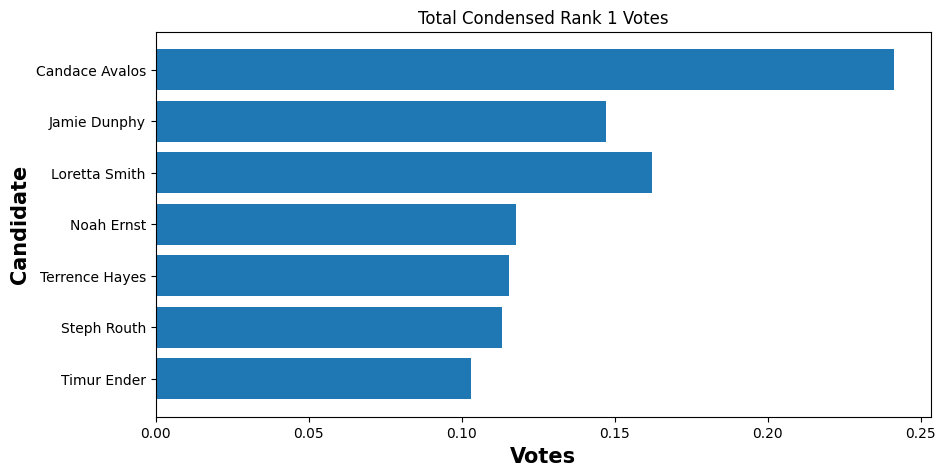

In [12]:
fig = plt.subplots(figsize =(10, 5))

condensed_rank1_plot = plt.barh(ind, condensed_rank1_pct)

plt.title('Total Condensed Rank 1 Votes')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.show()

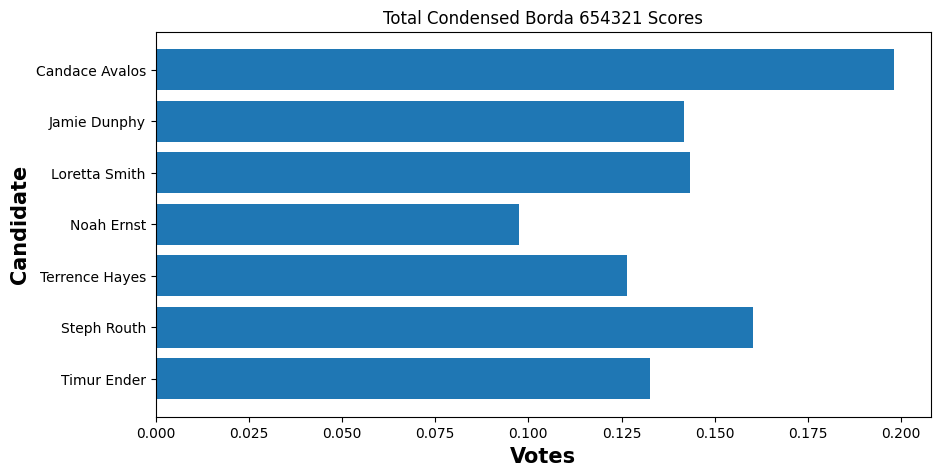

In [13]:
fig = plt.subplots(figsize =(10, 5))

condensed_borda654321_plot = plt.barh(ind, condensed_borda654321_pct)

plt.title('Total Condensed Borda 654321 Scores')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.show()

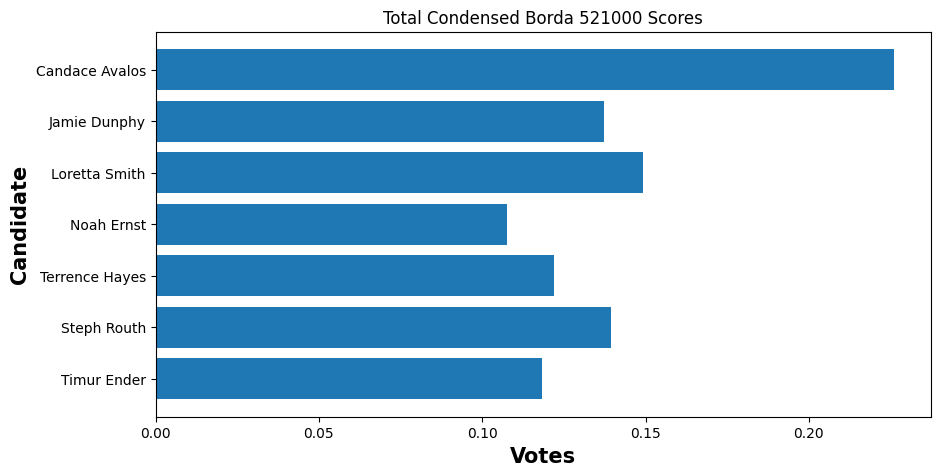

In [14]:
fig = plt.subplots(figsize =(10, 5))

condensed_borda521000_plot = plt.barh(ind, condensed_borda521000_pct)

plt.title('Total Condensed Borda 521000 Scores')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.show()

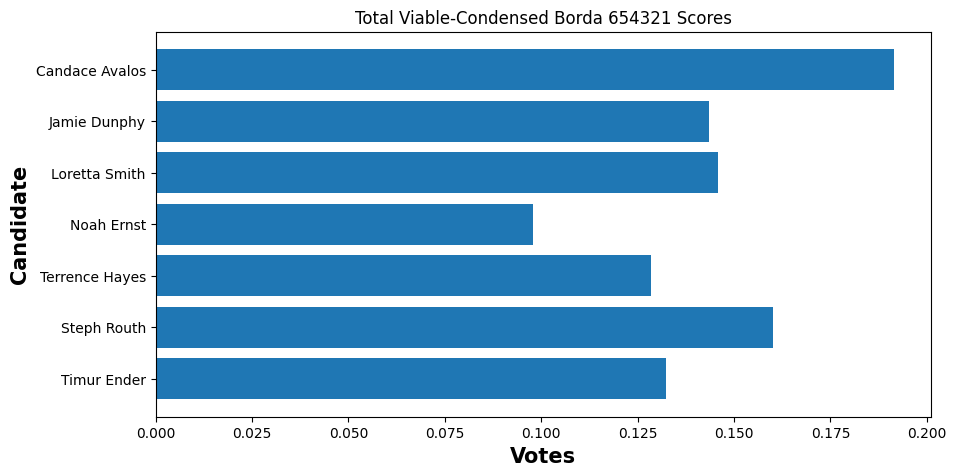

In [15]:
fig = plt.subplots(figsize =(10, 5))

viable_condensed_borda654321_plot = plt.barh(ind, viable_condensed_borda654321_pct)

plt.title('Total Viable-Condensed Borda 654321 Scores')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.show()

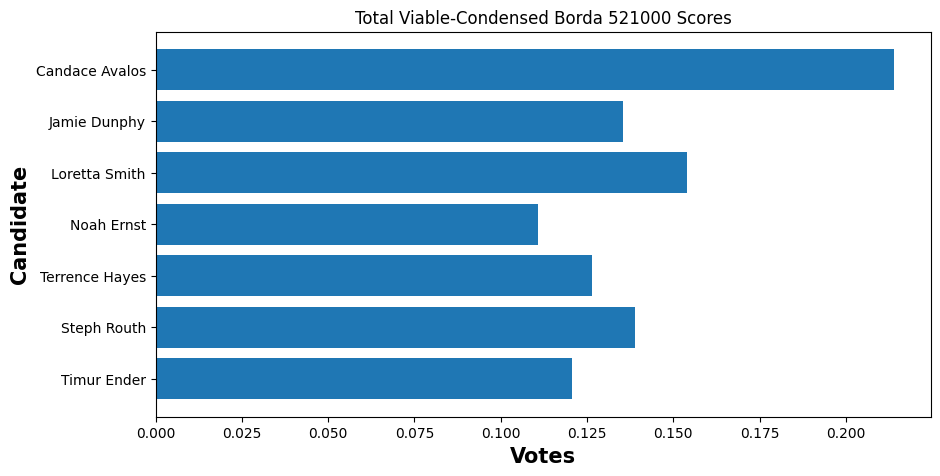

In [16]:
fig = plt.subplots(figsize =(10, 5))

viable_condensed_borda521000_plot = plt.barh(ind, viable_condensed_borda521000_pct)

plt.title('Total Viable-Condensed Borda 521000 Scores')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.show()

### All together!

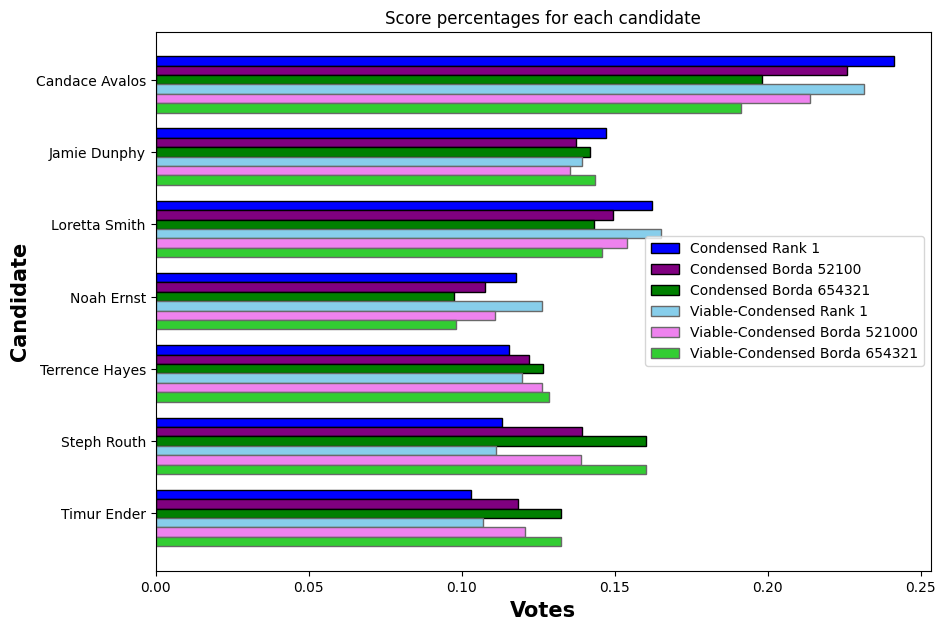

In [17]:
fig = plt.subplots(figsize =(10, len(D1_viable_candidates)))

barWidth = 0.13

# Set position of bar on Y axis
br3 = np.arange(len(D1_viable_candidates))
br2 = [x + barWidth for x in br3]
br1 = [x + barWidth for x in br2]
br4 = [x - barWidth for x in br3]
br5 = [x - barWidth for x in br4]
br6 = [x - barWidth for x in br5]


condensed_rank1_plot = plt.barh(br1, condensed_rank1_pct, color = 'blue', height = barWidth, edgecolor = 'black')
condensed_borda521000_plot = plt.barh(br2, condensed_borda521000_pct, color= 'purple', height = barWidth, edgecolor = 'black')
condensed_borda654321_plot = plt.barh(br3, condensed_borda654321_pct, color= 'green', height = barWidth, edgecolor = 'black')
viable_condensed_rank1_plot = plt.barh(br4, viable_condensed_rank1_pct, color= 'skyblue', height = barWidth, edgecolor = 'dimgrey')
viable_condensed_borda521000_plot = plt.barh(br5, viable_condensed_borda521000_pct, color= 'violet', height = barWidth, edgecolor = 'dimgrey')
viable_condensed_borda654321_plot = plt.barh(br6, viable_condensed_borda654321_pct, color= 'limegreen', height = barWidth, edgecolor = 'dimgrey')

plt.title('Score percentages for each candidate')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.legend((condensed_rank1_plot[0], condensed_borda521000_plot[0], condensed_borda654321_plot[0], 
           viable_condensed_rank1_plot[0], viable_condensed_borda521000_plot[0], viable_condensed_borda654321_plot[0]), 
           ('Condensed Rank 1', 'Condensed Borda 52100', 'Condensed Borda 654321', 
            'Viable-Condensed Rank 1', 'Viable-Condensed Borda 521000', 'Viable-Condensed Borda 654321'))


plt.show()

### Just the condensed versions:

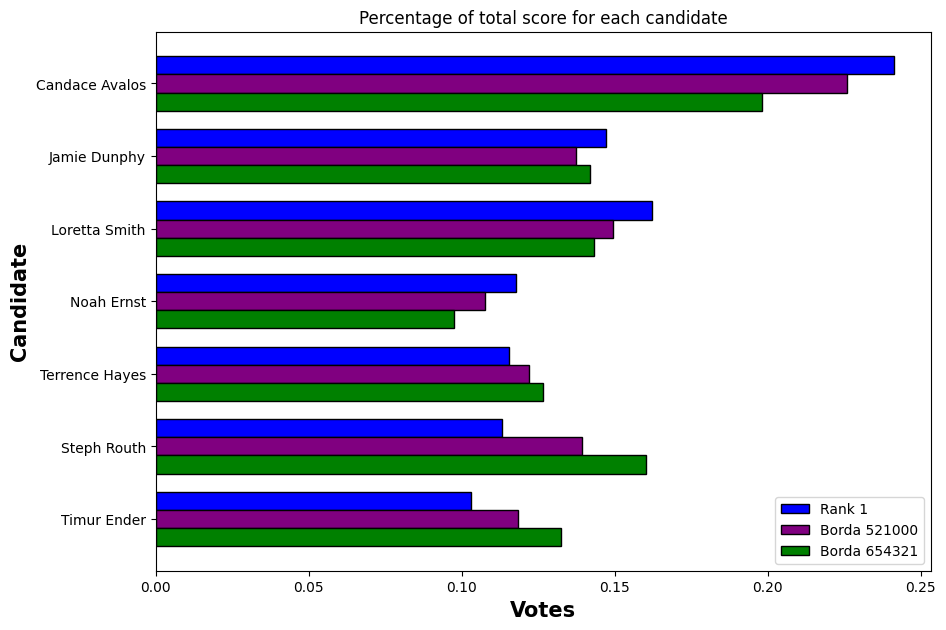

In [18]:
fig = plt.subplots(figsize =(10, len(D1_viable_candidates)))

barWidth = 0.25

# Set position of bar on Y axis
br2 = np.arange(len(D1_viable_candidates))
br1 = [x + barWidth for x in br2]
br3= [x - barWidth for x in br2]


condensed_rank1_plot = plt.barh(br1, condensed_rank1_pct, color = 'blue', height = barWidth, edgecolor = 'black')
condensed_borda521000_plot = plt.barh(br2, condensed_borda521000_pct, color= 'purple', height = barWidth, edgecolor = 'black')
condensed_borda654321_plot = plt.barh(br3, condensed_borda654321_pct, color= 'green', height = barWidth, edgecolor = 'black')

plt.title('Percentage of total score for each candidate')

plt.ylabel('Candidate', fontweight ='bold', fontsize = 15)
plt.xlabel('Votes', fontweight ='bold', fontsize = 15)
plt.yticks(ind, tuple(D1_viable_candidates_reversed))

plt.legend((condensed_rank1_plot[0], condensed_borda521000_plot[0], condensed_borda654321_plot[0]), 
           ('Rank 1', 'Borda 521000', 'Borda 654321'))


plt.show()

### Make choropleths of support of various types for viable candidates.

In [19]:
for name in D1_viable_candidates:
    D1_precincts_df[name + ' Condensed Rank 1 pct'] = D1_precincts_df[name + ' Condensed Rank 1']/D1_precincts_df['Condensed total votes']
    D1_precincts_df[name + ' Condensed Borda 654321 pct'] = D1_precincts_df[name + ' Condensed Borda 654321']/D1_precincts_df['Condensed Borda 654321 total']
    D1_precincts_df[name + ' Condensed Borda 521000 pct'] = D1_precincts_df[name + ' Condensed Borda 521000']/D1_precincts_df['Condensed Borda 521000 total']
    D1_precincts_df[name + ' Condensed Borda 654321 avg'] = D1_precincts_df[name + ' Condensed Borda 654321']/D1_precincts_df['Condensed total votes']
    D1_precincts_df[name + ' Condensed Borda 521000 avg'] = D1_precincts_df[name + ' Condensed Borda 521000']/D1_precincts_df['Condensed total votes']

    D1_precincts_df[name + ' Viable-Condensed Rank 1 pct'] = D1_precincts_df[name + ' Viable-Condensed Rank 1']/D1_precincts_df['Viable-Condensed total votes']
    D1_precincts_df[name + ' Viable-Condensed Borda 654321 pct'] = D1_precincts_df[name + ' Viable-Condensed Borda 654321']/D1_precincts_df['Viable-Condensed Borda 654321 total']
    D1_precincts_df[name + ' Viable-Condensed Borda 521000 pct'] = D1_precincts_df[name + ' Viable-Condensed Borda 521000']/D1_precincts_df['Viable-Condensed Borda 521000 total']
    D1_precincts_df[name + ' Viable-Condensed Borda 654321 avg'] = D1_precincts_df[name + ' Viable-Condensed Borda 654321']/D1_precincts_df['Viable-Condensed total votes']
    D1_precincts_df[name + ' Viable-Condensed Borda 521000 avg'] = D1_precincts_df[name + ' Viable-Condensed Borda 521000']/D1_precincts_df['Viable-Condensed total votes']
    

In [20]:
D1_precincts_df = D1_precincts_df.fillna(0)

In [21]:
for name in D1_viable_candidates:
    print(name)
    print(max(D1_precincts_df[name + ' Condensed Rank 1 pct']), max(D1_precincts_df[name + ' Condensed Borda 654321 pct']), max(D1_precincts_df[name + ' Condensed Borda 521000 pct']))
    print(max(D1_precincts_df[name + ' Condensed Borda 654321 avg']), max(D1_precincts_df[name + ' Condensed Borda 521000 avg']))

    print(max(D1_precincts_df[name + ' Viable-Condensed Rank 1 pct']), max(D1_precincts_df[name + ' Viable-Condensed Borda 654321 pct']), max(D1_precincts_df[name + ' Viable-Condensed Borda 521000 pct']))
    print(max(D1_precincts_df[name + ' Viable-Condensed Borda 654321 avg']), max(D1_precincts_df[name + ' Viable-Condensed Borda 521000 avg']))
    print()

Candace Avalos
0.2732696897374702 0.17533826196122193 0.2305400956337697
3.0 1.7547732696897376
0.5 0.2727272727272727 0.4
3.298628428927681 2.5

Jamie Dunphy
0.2 0.1310148034415829 0.16666666666666666
2.2666666666666666 1.2666666666666666
0.21428571428571427 0.20454545454545456 0.18867924528301888
2.7857142857142856 1.4285714285714286

Loretta Smith
0.21710526315789475 0.13902711485731695 0.17665130568356374
2.2516447368421053 1.324013157894737
0.2708333333333333 0.2020497803806735 0.23529411764705882
2.875 1.75

Noah Ernst
0.2727272727272727 0.14694656488549618 0.20081967213114754
2.3333333333333335 1.4848484848484849
0.2727272727272727 0.20454545454545456 0.20987654320987653
2.393939393939394 1.5454545454545454

Terrence Hayes
0.24242424242424243 0.16221374045801526 0.20901639344262296
2.5757575757575757 1.5454545454545454
0.2727272727272727 0.19870410367170627 0.23045267489711935
2.787878787878788 1.696969696969697

Steph Routh
0.13907815631262524 0.1434315408309624 0.1492348950938

### Condensed Rank 1 support:

In [22]:
#for name in D1_viable_candidates:
#    max_support = max(D1_precincts_df[name + ' Condensed Rank 1 pct'])
#    
#    choro = choropleth(
#        D1_precincts_df,
#        D1_precincts_df,
#        assignment="Precinct",
#        demographic_share_col=name + ' Condensed Rank 1 pct',
#        overlays=[],
#        cmap="Blues",
#        cbartitle=name + ' Condensed Rank 1 pct',
#        district_lw=0.01,
#        base_lw=0.01,
#        base_linecolor="black",
#        numbers=False,
#        min = 0,
#        max = 1.1*max_support,
#        interval = 1.1*max_support/10
#)

### Find the max value over all candidates to use a common scale:

In [23]:
rank1_max_value = max([max(D1_precincts_df[name + ' Condensed Rank 1 pct']) for name in D1_viable_candidates])
rank1_max_value

0.2732696897374702

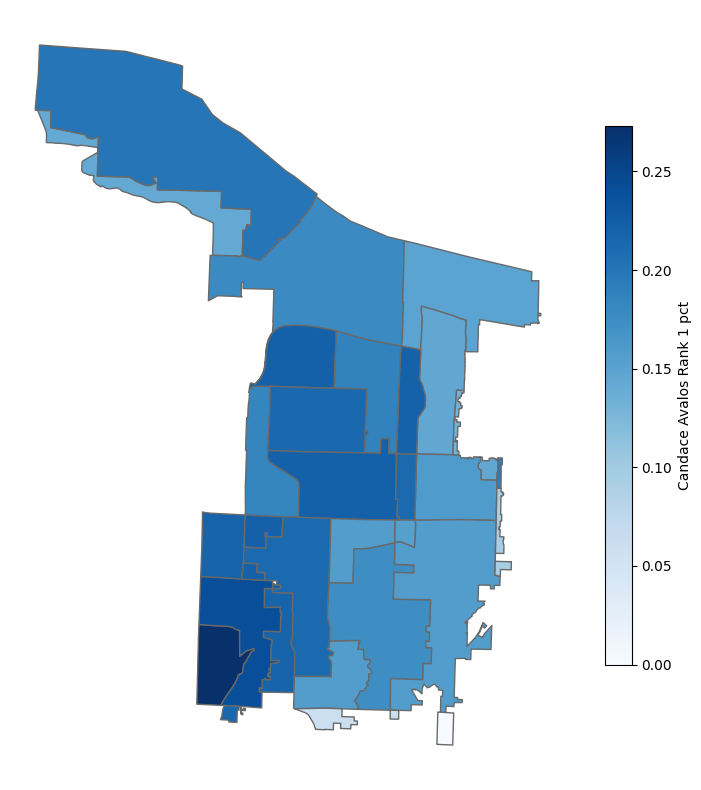

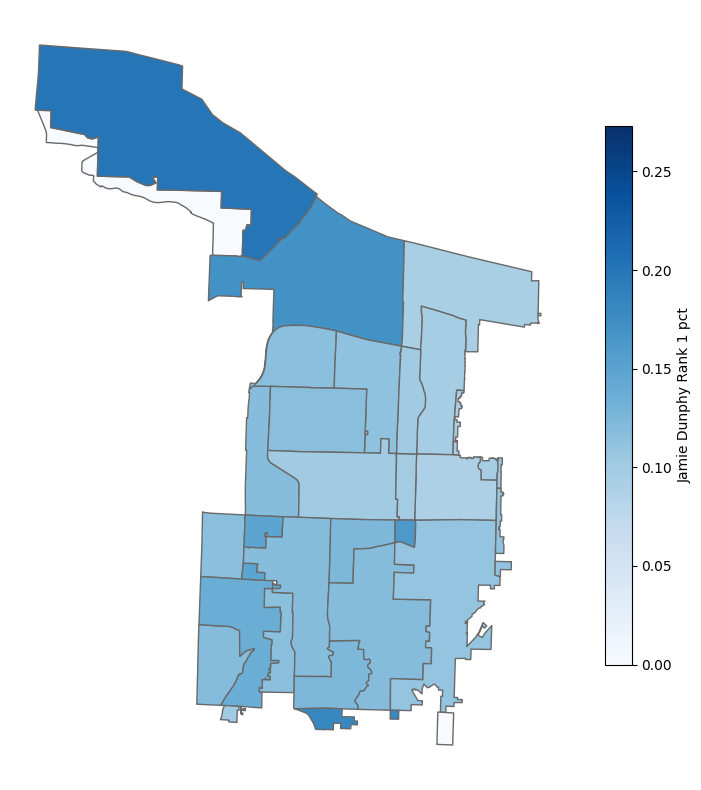

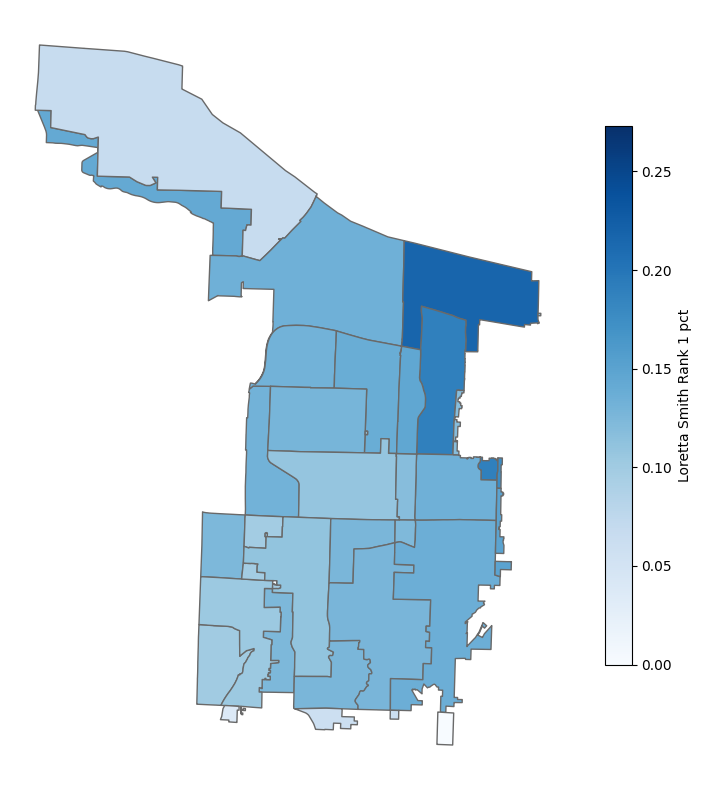

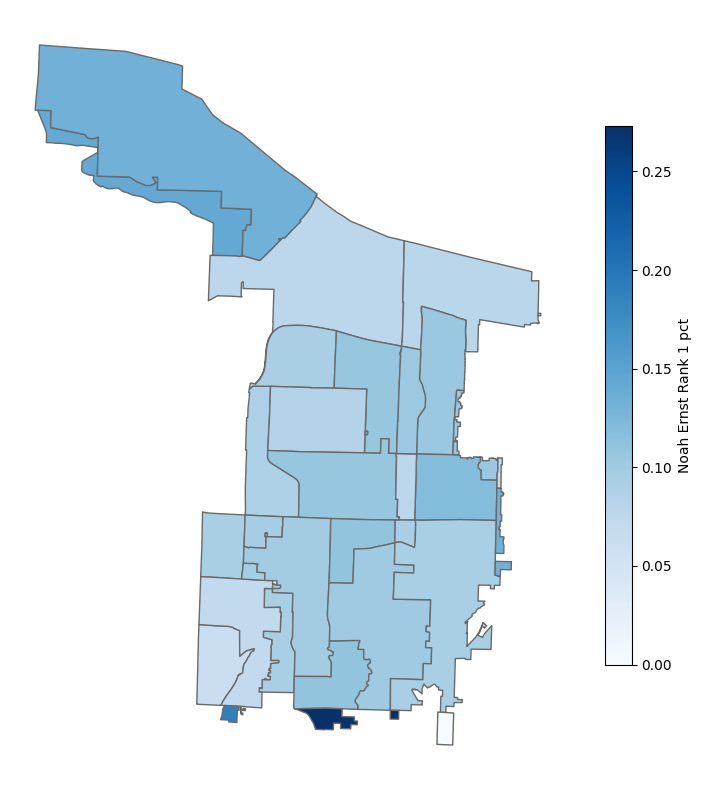

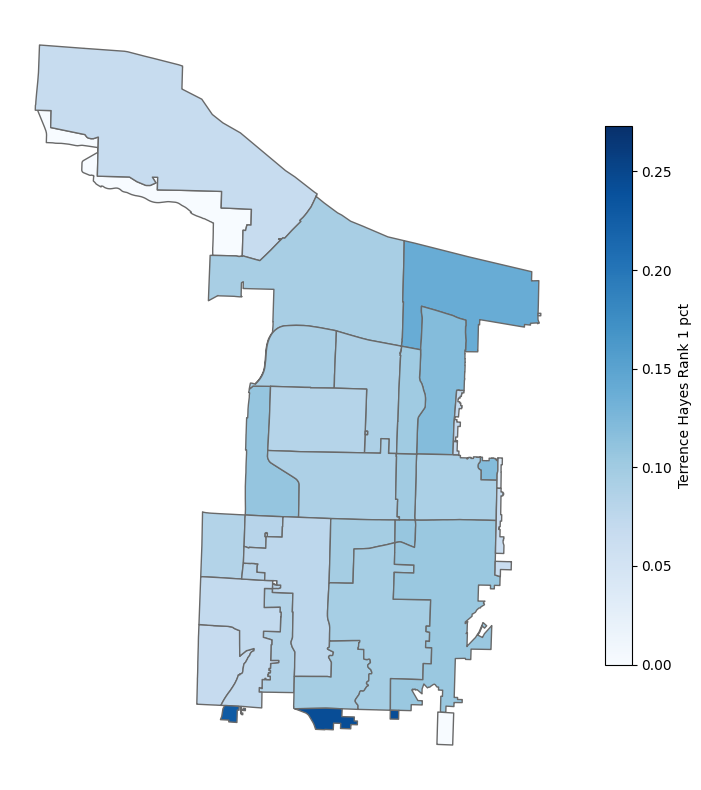

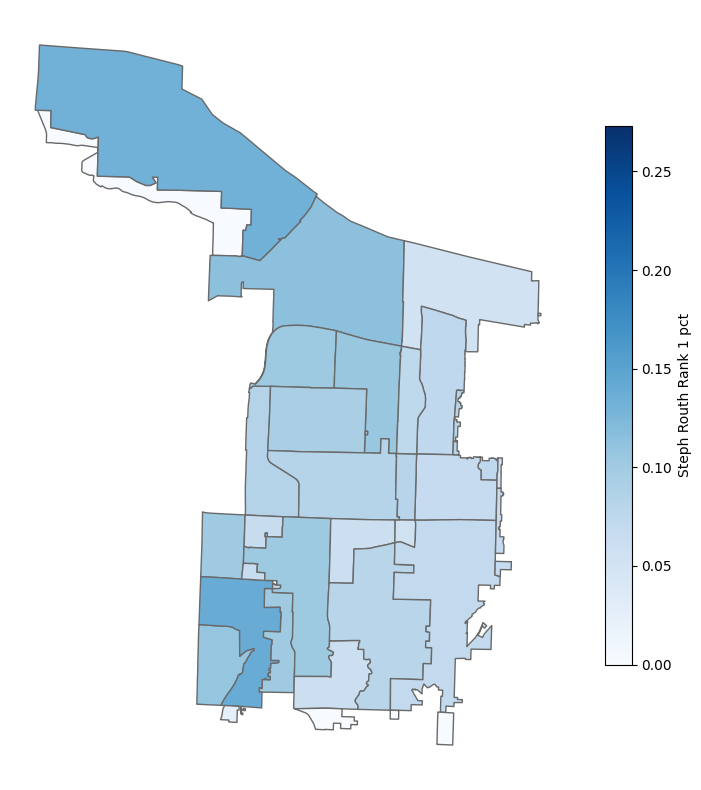

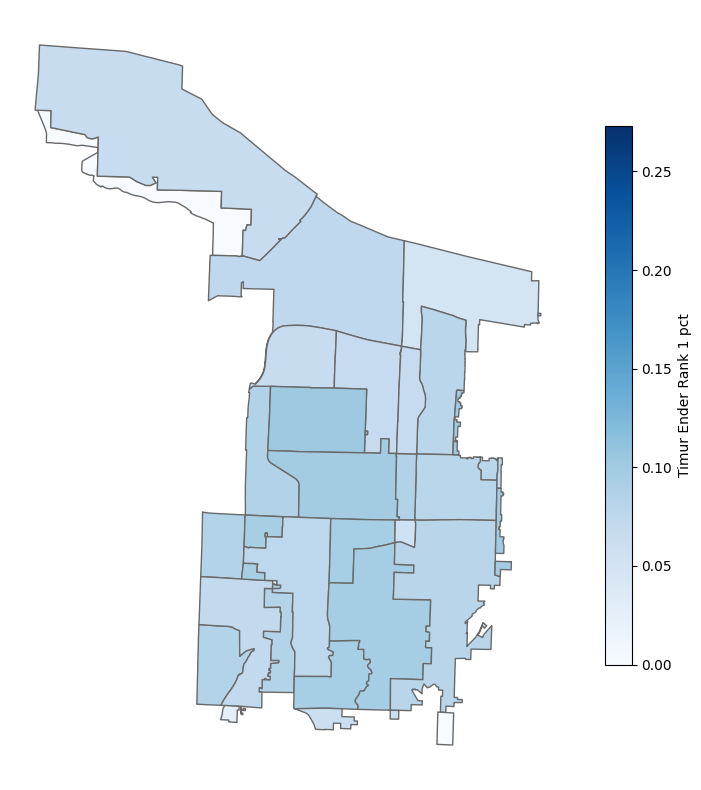

In [24]:
for name in D1_viable_candidates:
    ax = D1_precincts_df.plot(column = name + ' Condensed Rank 1 pct', legend = True,
                              legend_kwds={"label": name + ' Rank 1 pct', 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Blues',
                              edgecolor = 'dimgrey',
                              vmin = 0,
                              vmax = rank1_max_value
                             )
    ax.set_axis_off()

### Condensed Borda 654321 support:

In [25]:
borda654321_max_value = max([max(D1_precincts_df[name + ' Condensed Borda 654321 avg']) for name in D1_viable_candidates])
borda654321_max_value

3.0

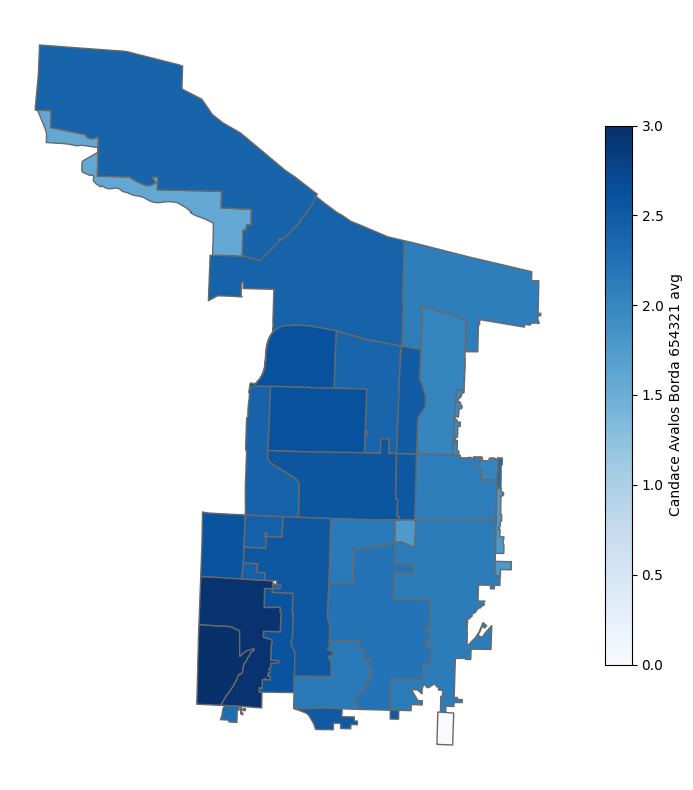

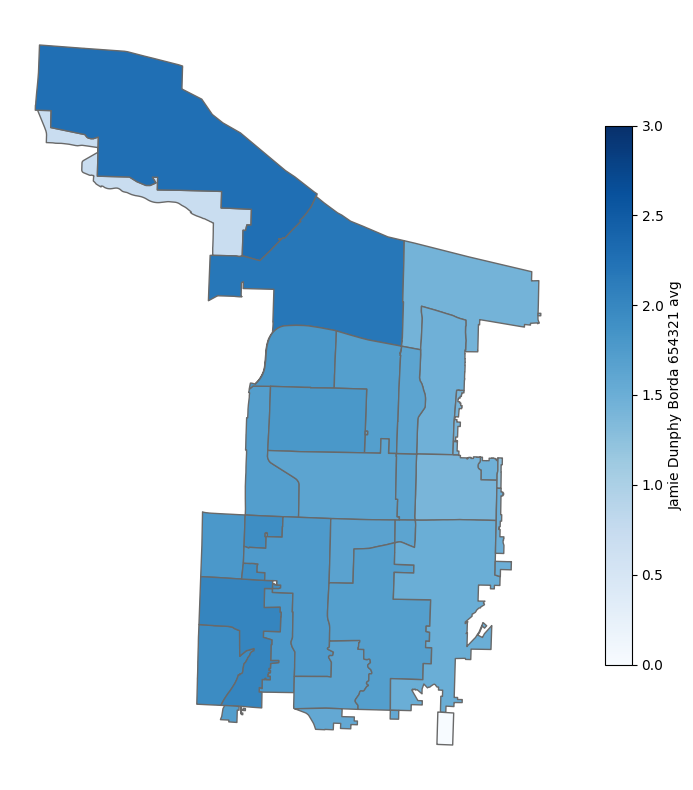

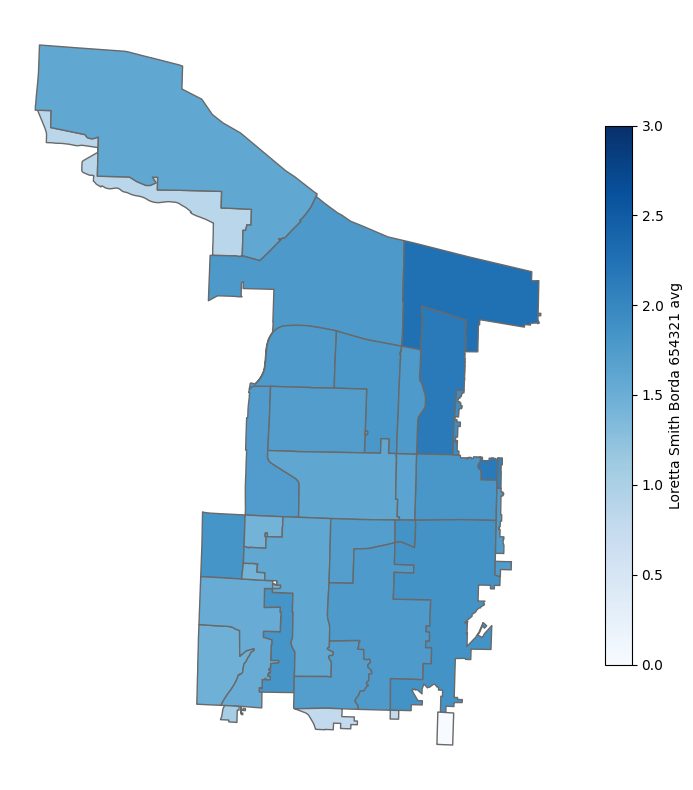

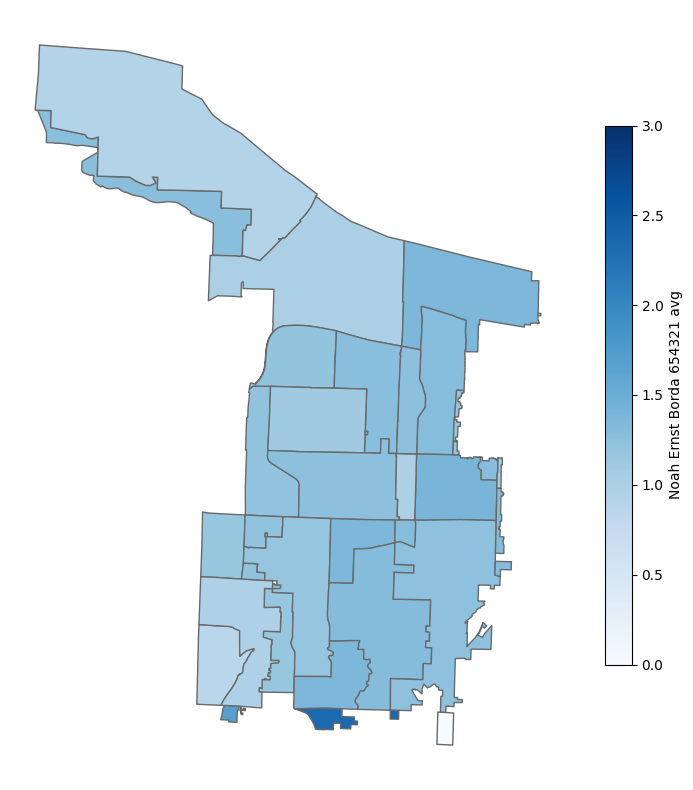

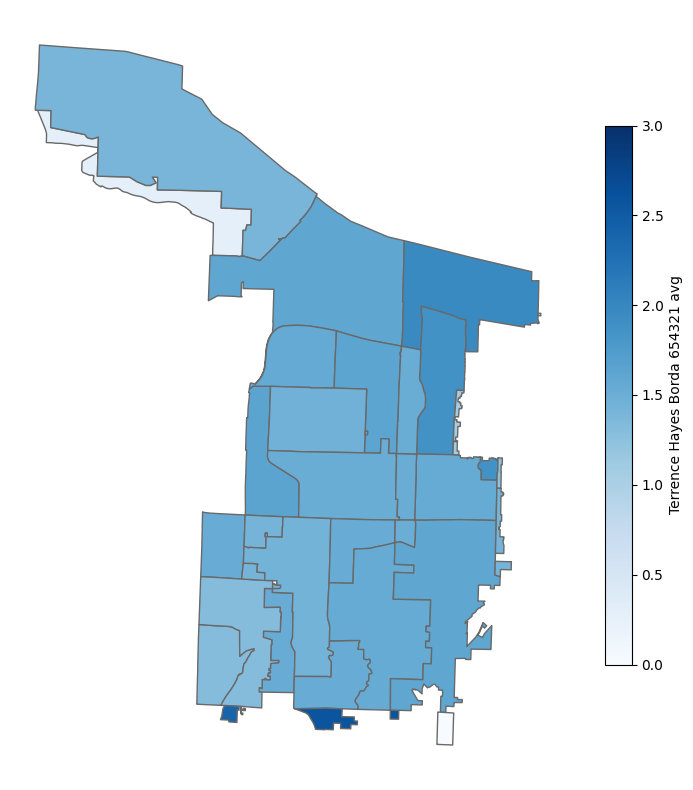

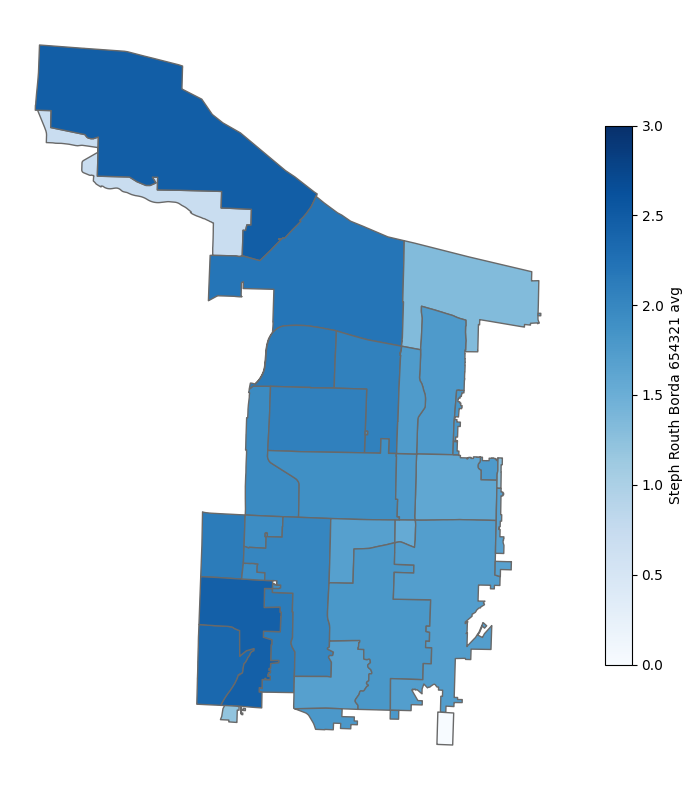

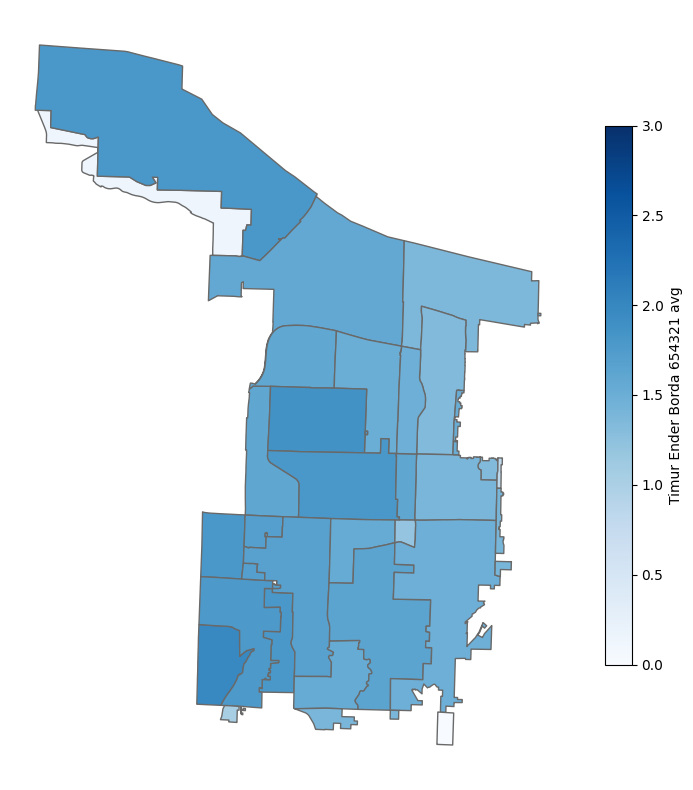

In [26]:
for name in D1_viable_candidates:
    ax = D1_precincts_df.plot(column = name + ' Condensed Borda 654321 avg', legend = True,
                              legend_kwds={"label": name + ' Borda 654321 avg', 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Blues',
                              edgecolor = 'dimgrey',
                              vmin = 0,
                              vmax = borda654321_max_value)
    ax.set_axis_off()

### Condensed Borda 521000 support:

In [27]:
borda521000_max_value = max([max(D1_precincts_df[name + ' Condensed Borda 521000 avg']) for name in D1_viable_candidates])
borda521000_max_value

1.7547732696897376

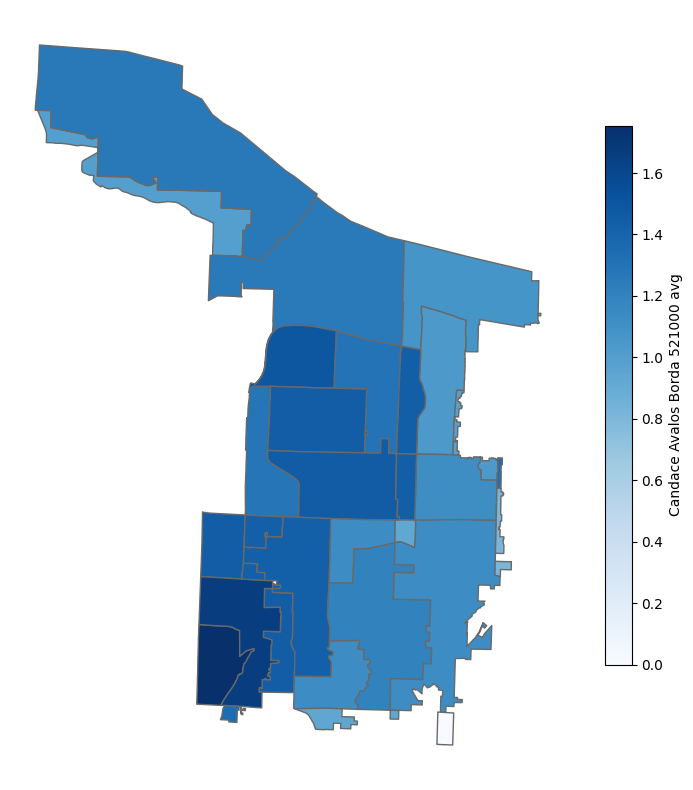

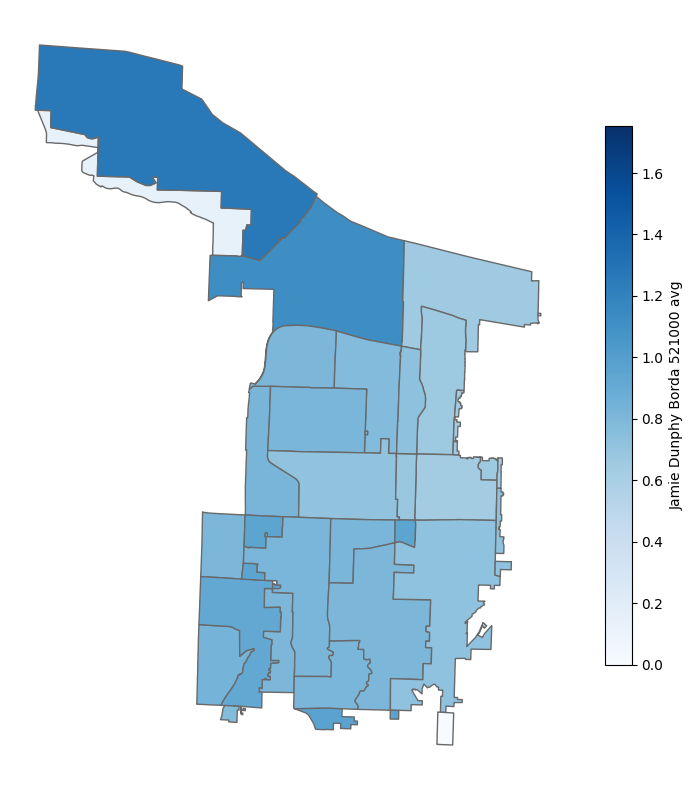

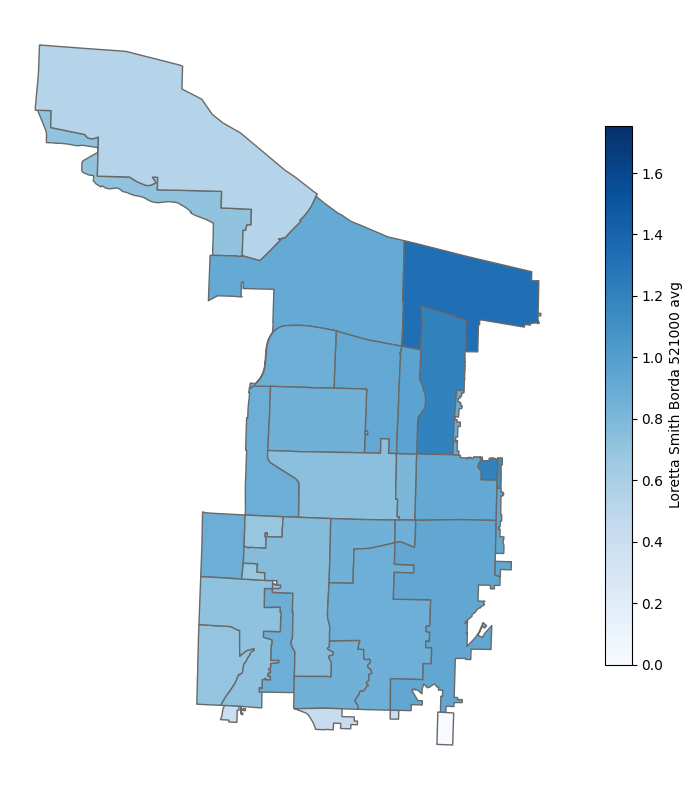

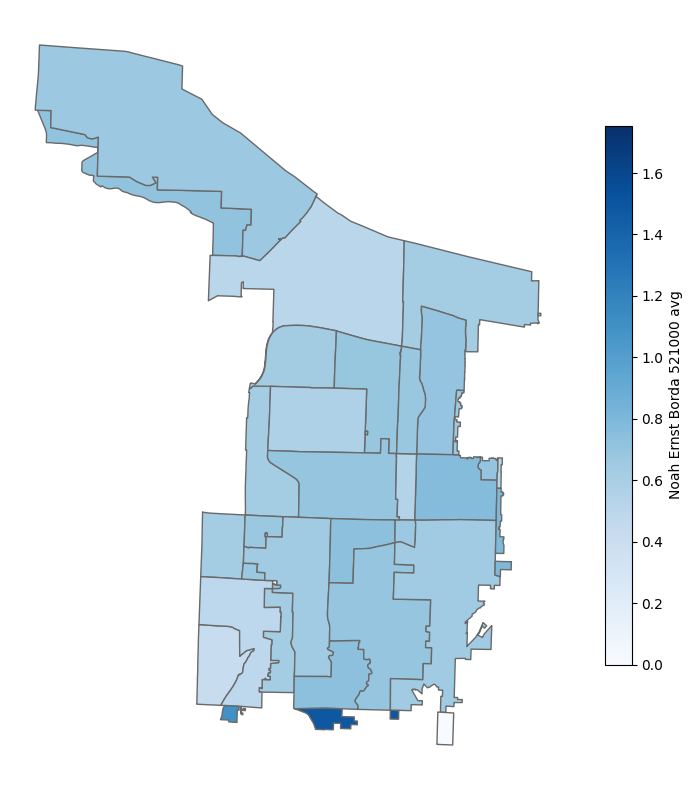

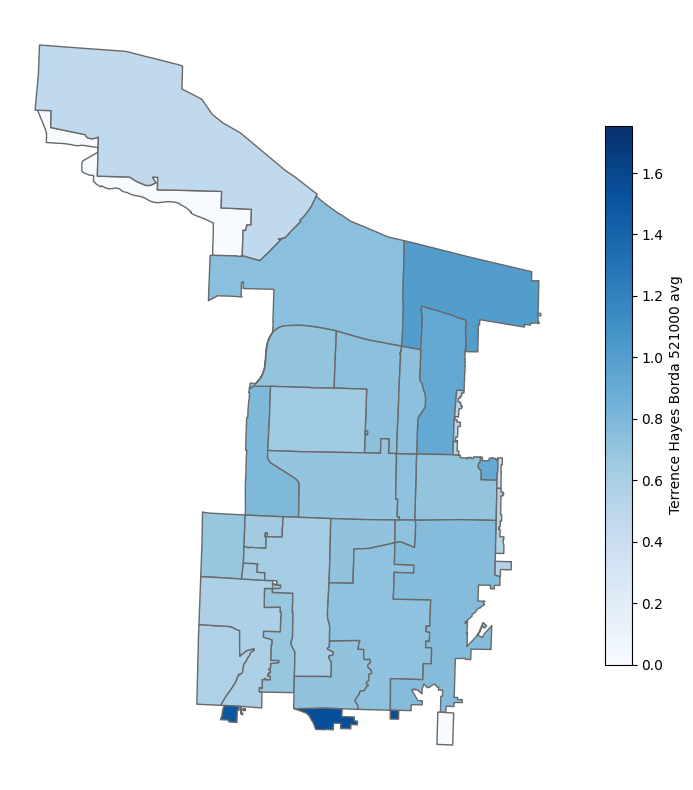

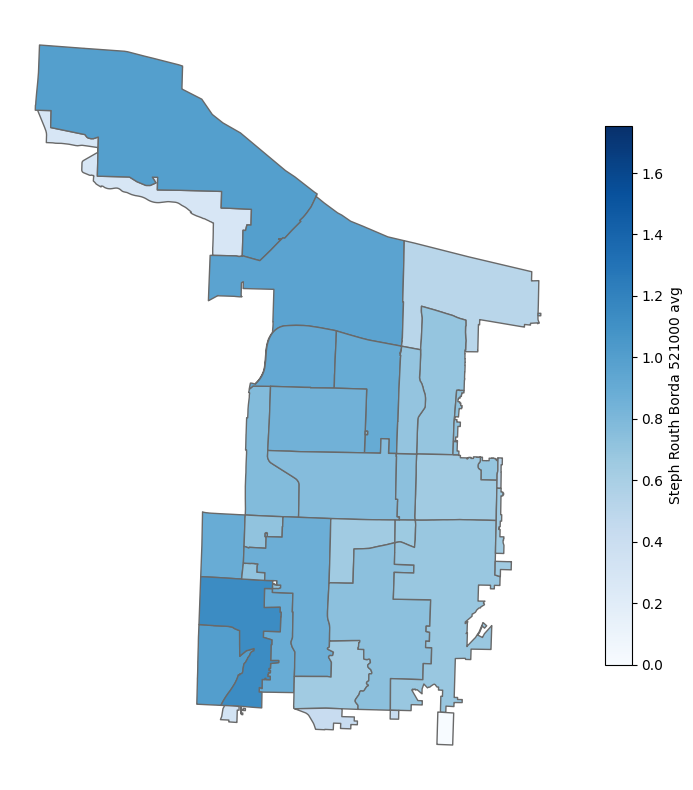

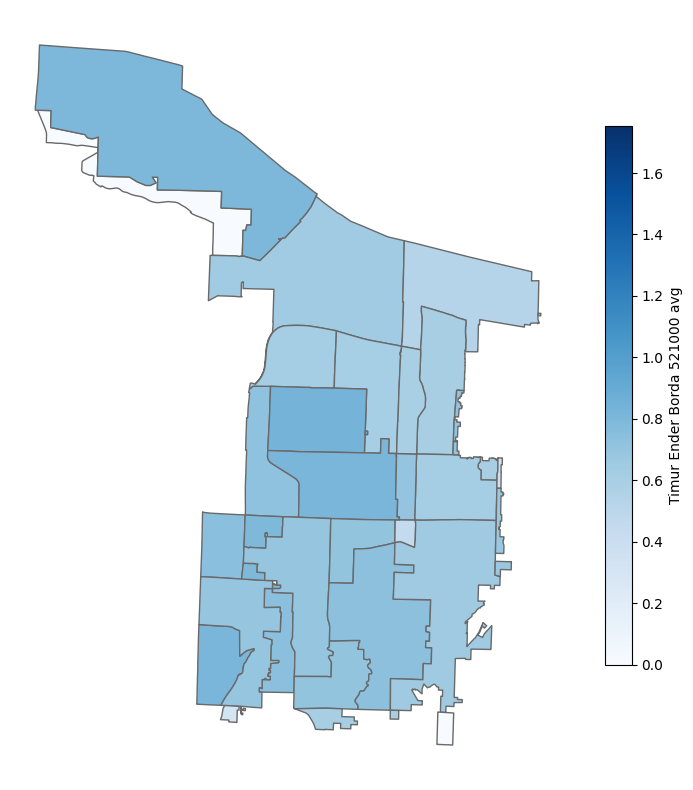

In [28]:
for name in D1_viable_candidates:
    ax = D1_precincts_df.plot(column = name + ' Condensed Borda 521000 avg', legend = True,
                              legend_kwds={"label": name + ' Borda 521000 avg', 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Blues',
                              edgecolor = 'dimgrey',
                              vmin = 0,
                              vmax = borda521000_max_value)
    ax.set_axis_off()

### Viable-Condensed Rank 1 support:

In [29]:
viable_rank1_max_value = max([max(D1_precincts_df[name + ' Viable-Condensed Rank 1 pct']) for name in D1_viable_candidates])
viable_rank1_max_value

0.5

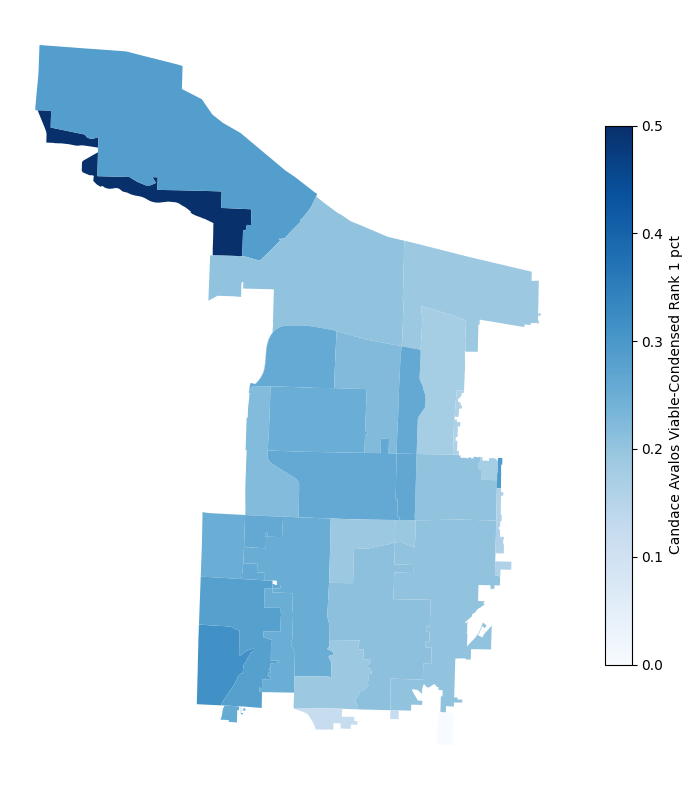

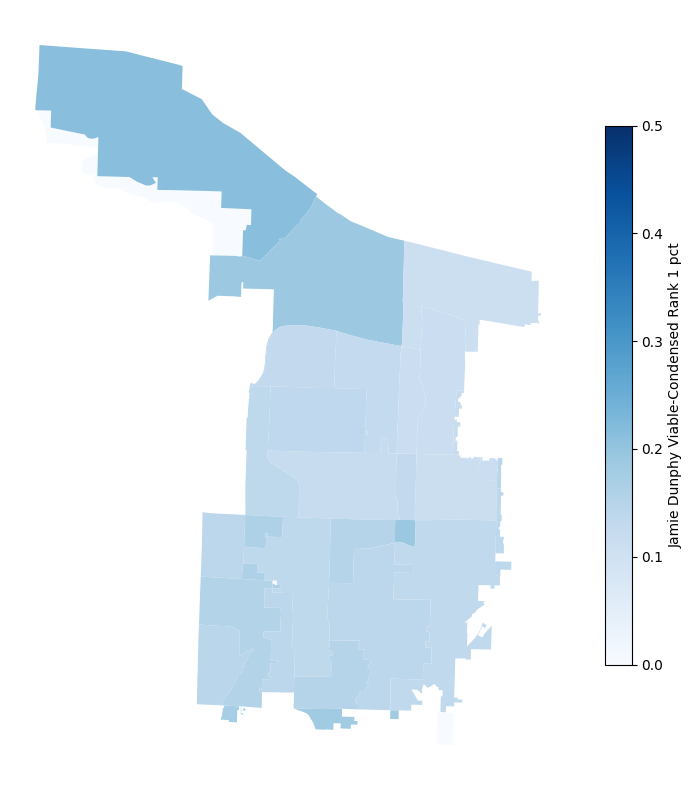

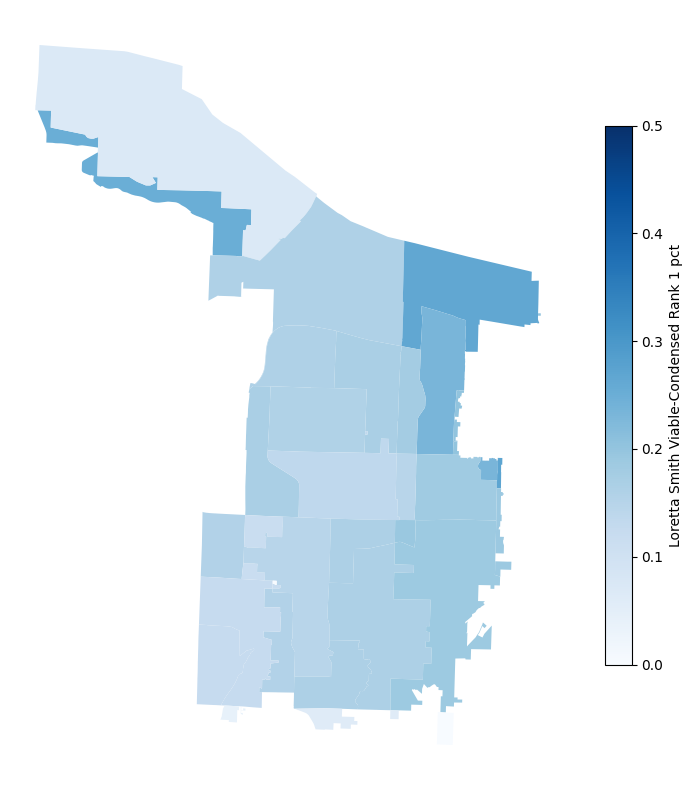

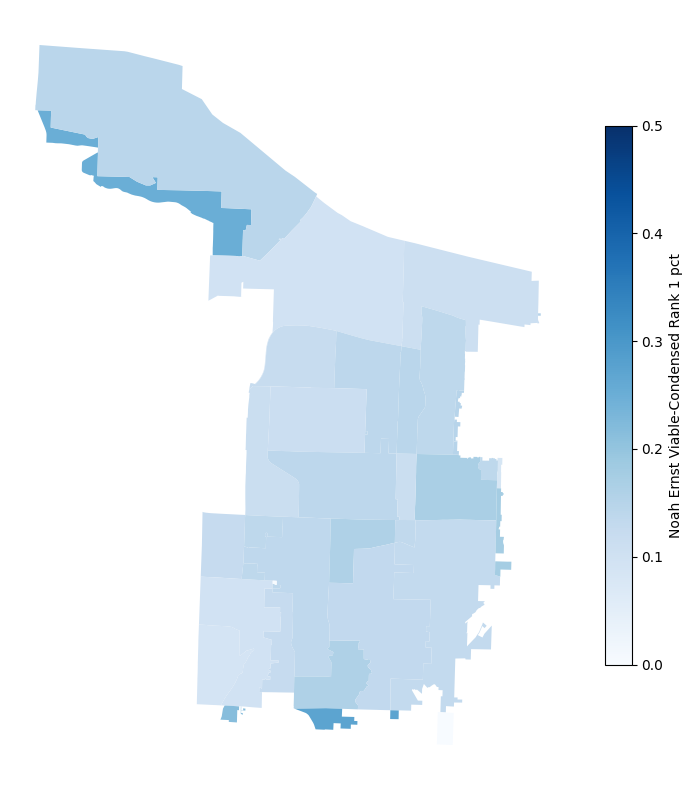

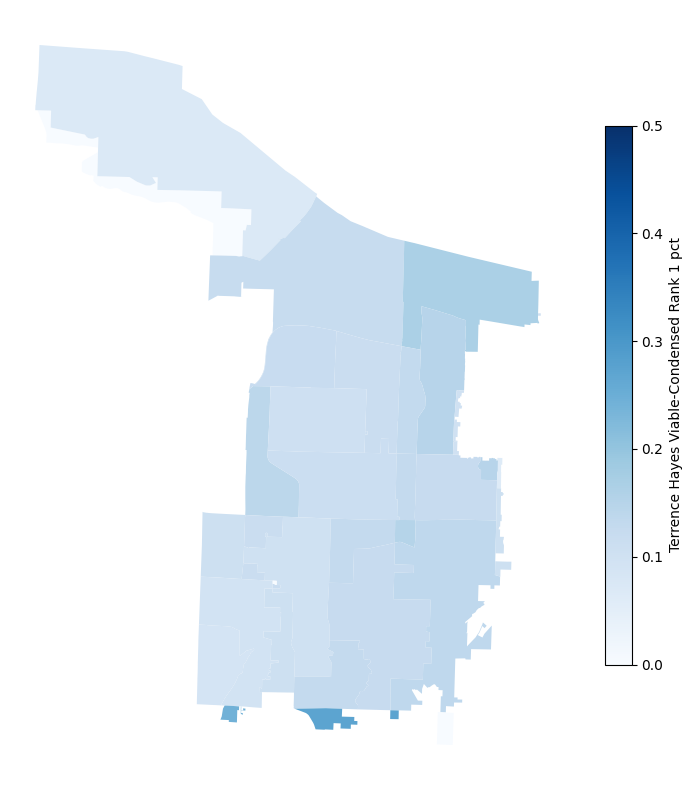

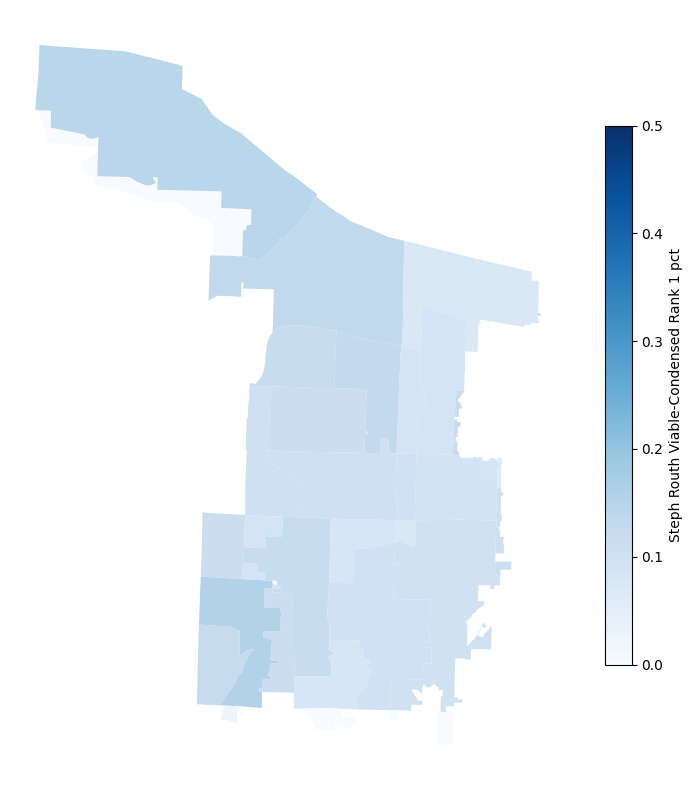

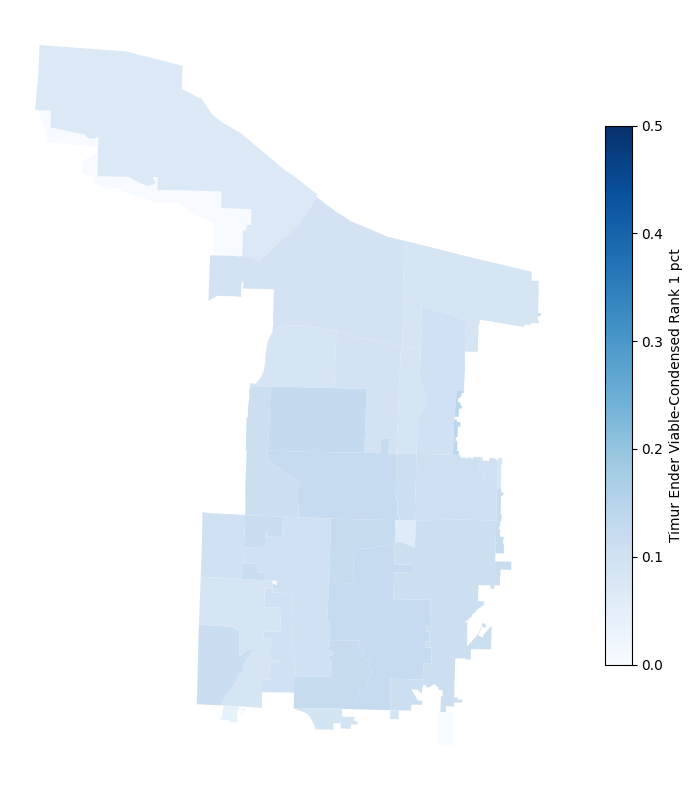

In [30]:
for name in D1_viable_candidates:
    ax = D1_precincts_df.plot(column = name + ' Viable-Condensed Rank 1 pct', legend = True,
                              legend_kwds={"label": name + ' Viable-Condensed Rank 1 pct', 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Blues',
                              vmin = 0,
                              vmax = viable_rank1_max_value)
    ax.set_axis_off()

### Viable-Condensed Borda 654321 support:

In [31]:
viable_borda654321_max_value = max([max(D1_precincts_df[name + ' Viable-Condensed Borda 654321 avg']) for name in D1_viable_candidates])
viable_borda654321_max_value

3.298628428927681

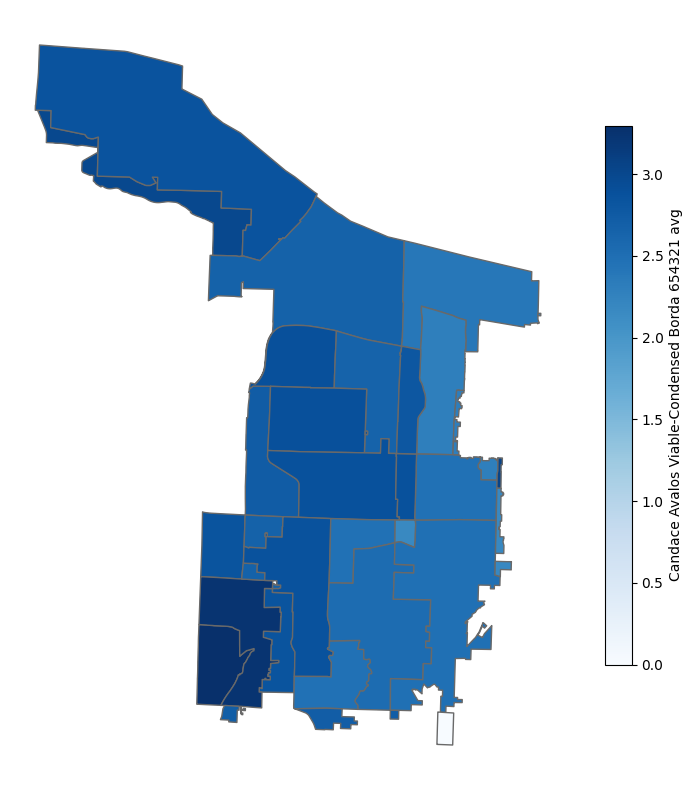

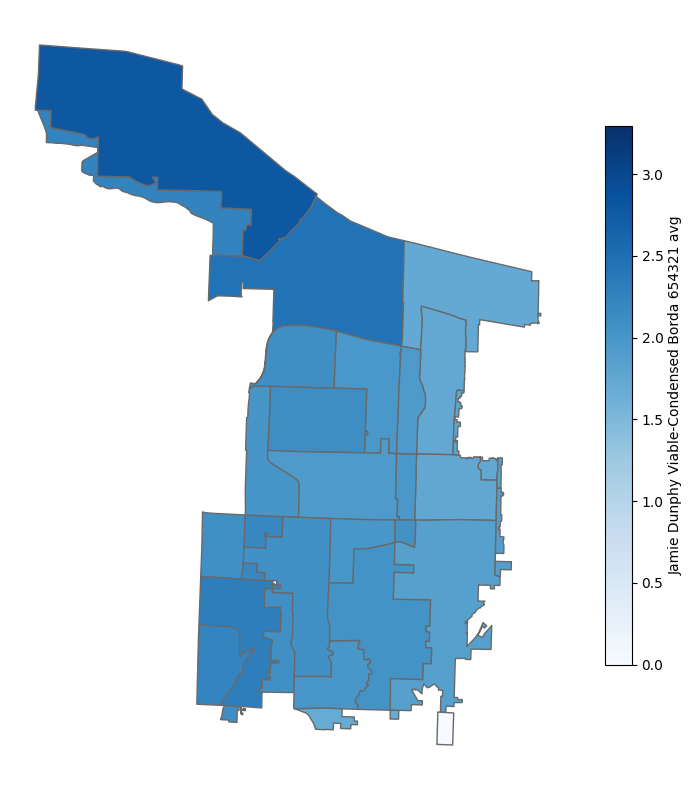

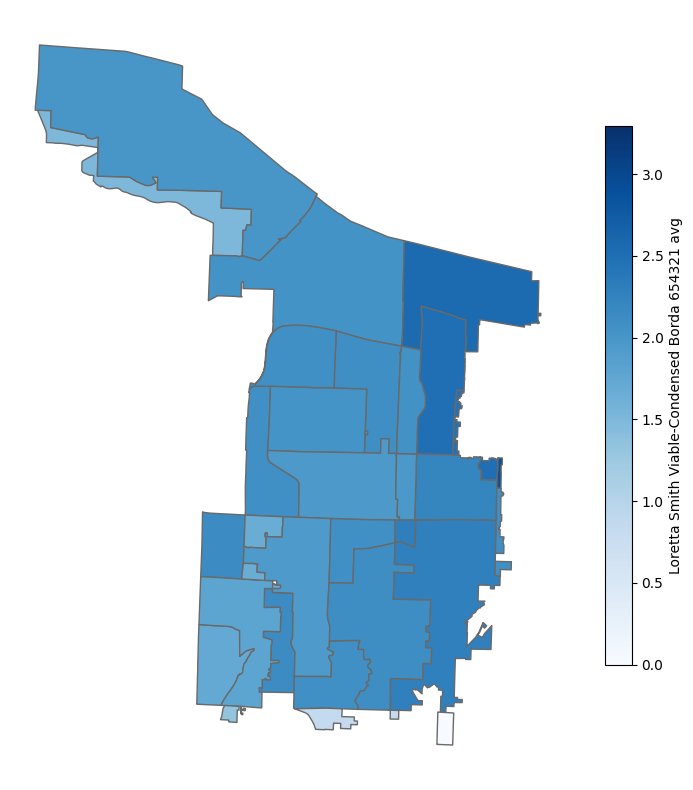

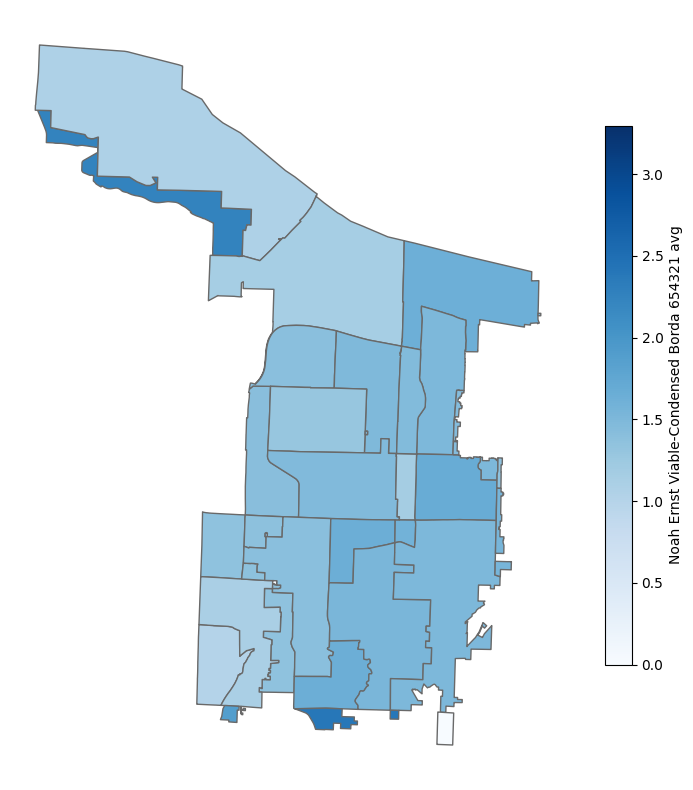

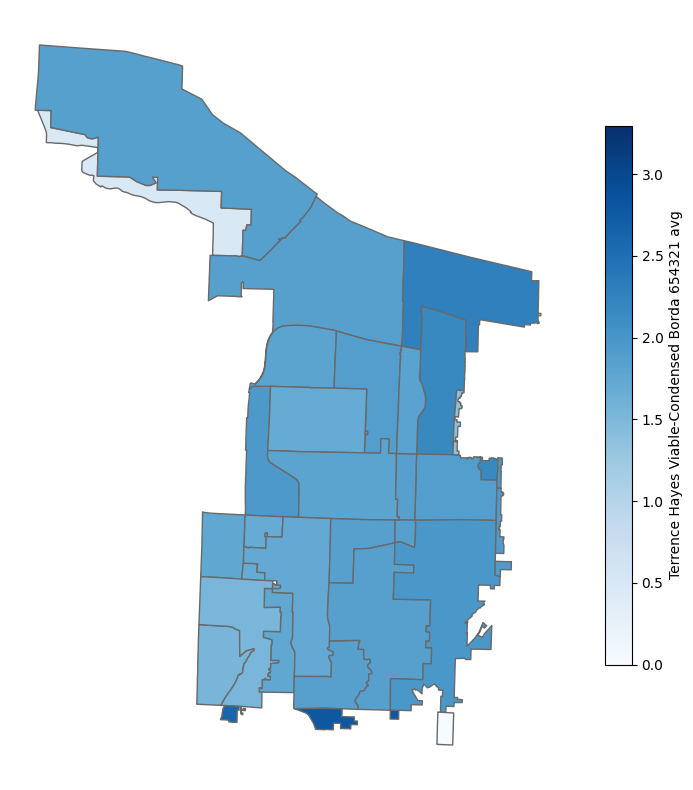

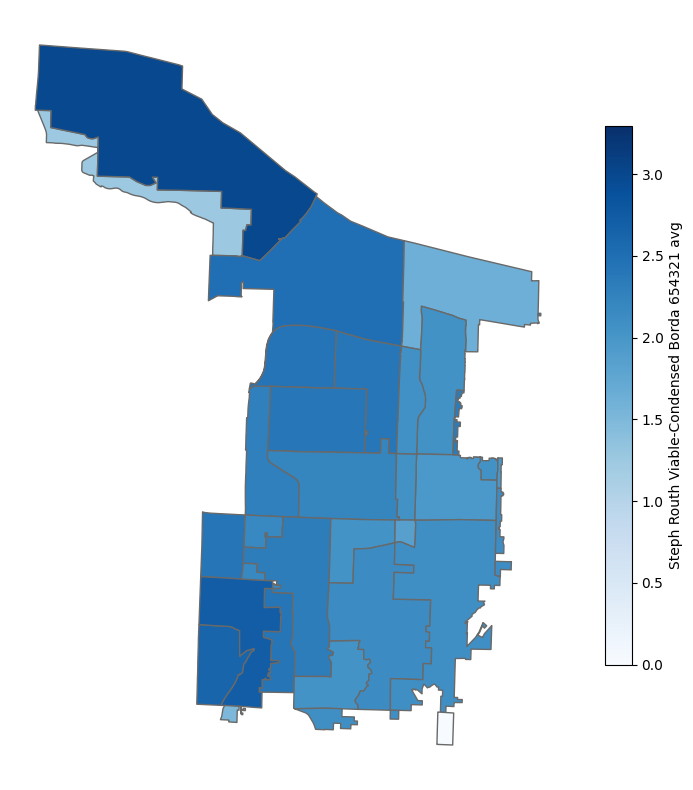

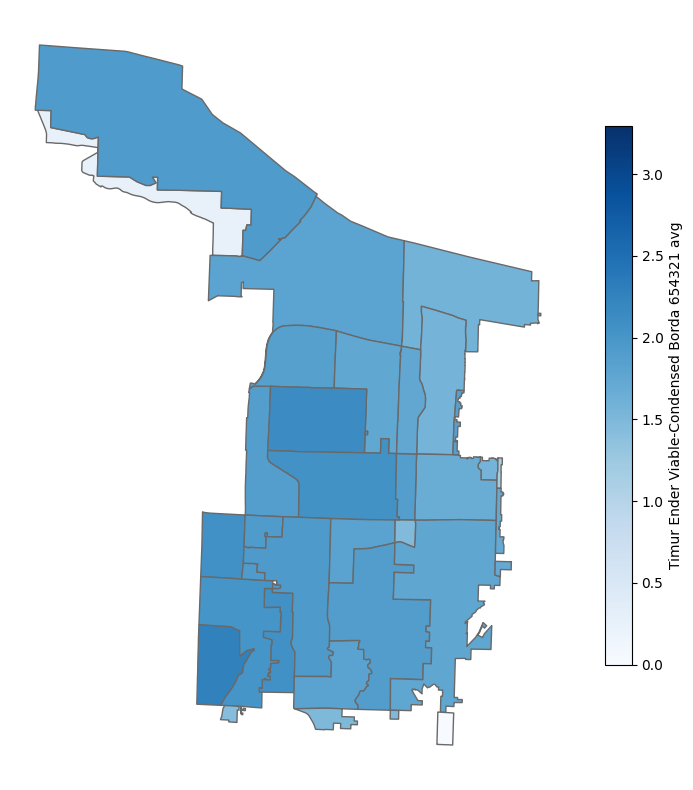

In [32]:
for name in D1_viable_candidates:
    ax = D1_precincts_df.plot(column = name + ' Viable-Condensed Borda 654321 avg', legend = True,
                              legend_kwds={"label": name + ' Viable-Condensed Borda 654321 avg', 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Blues',
                              edgecolor = 'dimgrey',
                              vmin = 0,
                              vmax = viable_borda654321_max_value)
    ax.set_axis_off()

### Viable-Condensed Borda 521000 support:

In [33]:
viable_borda521000_max_value = max([max(D1_precincts_df[name + ' Viable-Condensed Borda 521000 avg']) for name in D1_viable_candidates])
viable_borda521000_max_value

2.5

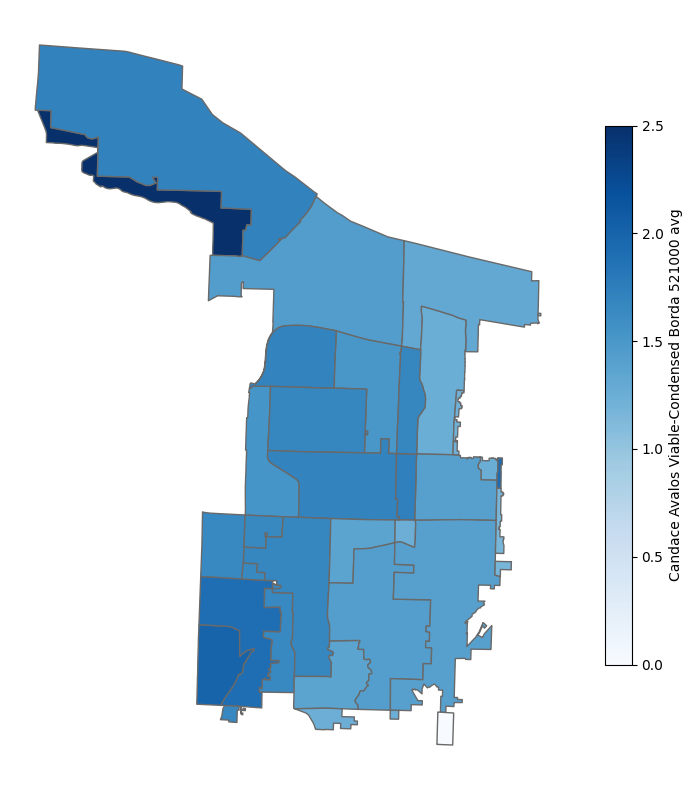

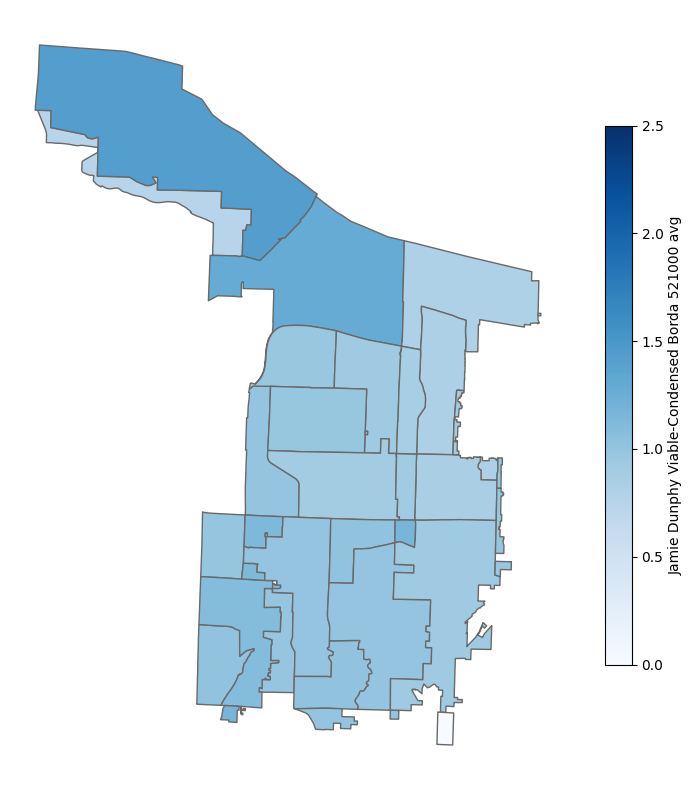

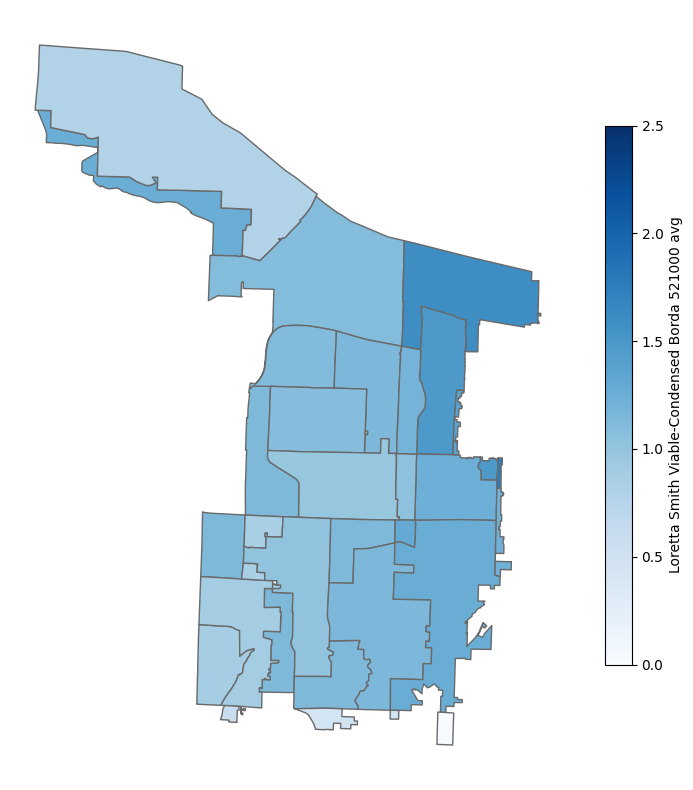

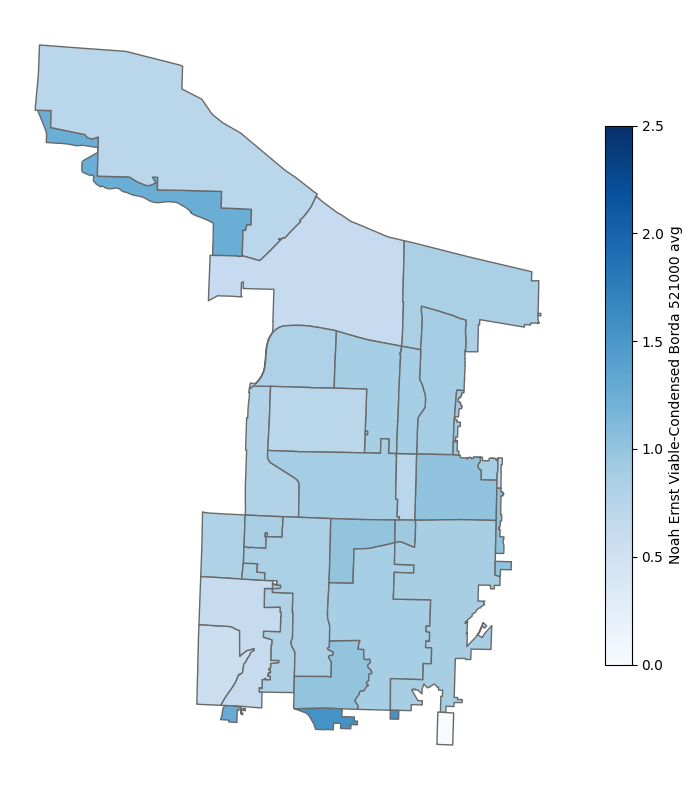

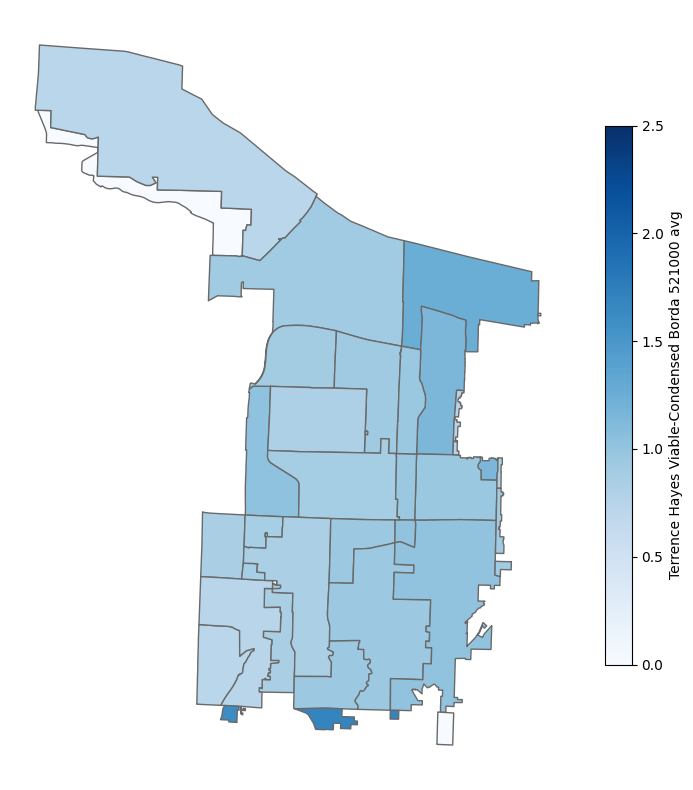

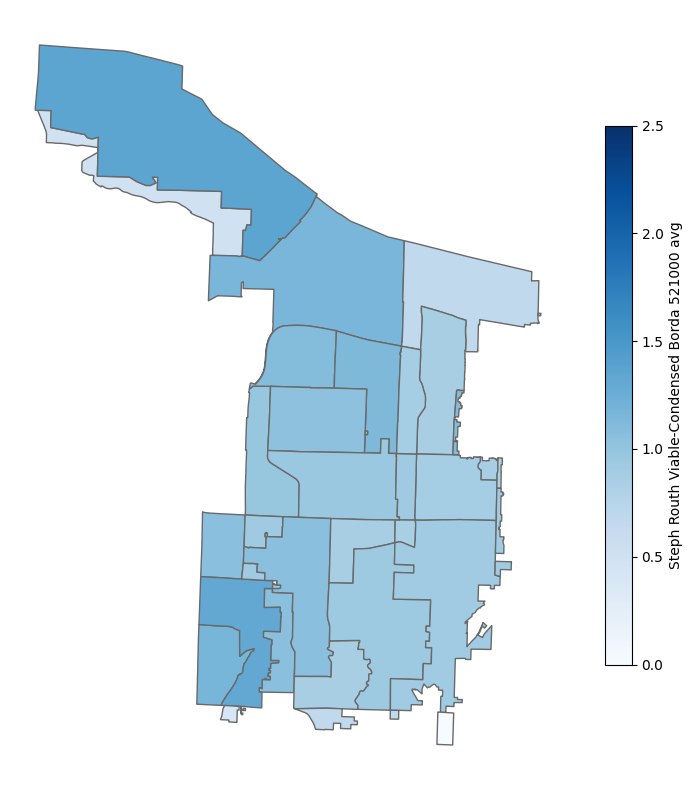

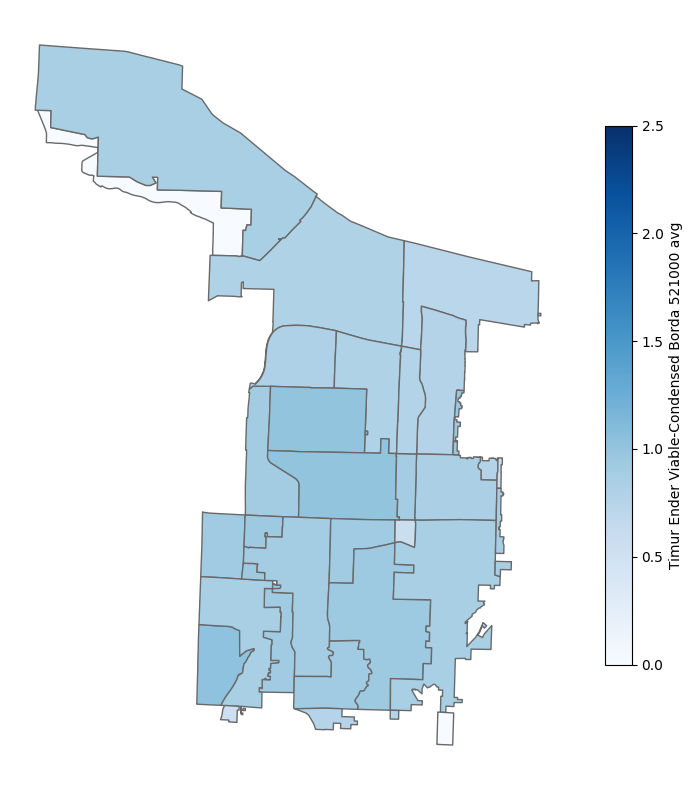

In [34]:
for name in D1_viable_candidates:
    ax = D1_precincts_df.plot(column = name + ' Viable-Condensed Borda 521000 avg', legend = True,
                              legend_kwds={"label": name + ' Viable-Condensed Borda 521000 avg', 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Blues',
                              edgecolor = 'dimgrey',
                              vmin = 0,
                              vmax = viable_borda521000_max_value)
    ax.set_axis_off()

### What's the precinct that really likes Avalos after viability-condensing but not before?  QGIS says it's M4406.

In [35]:
D1_precincts_df[D1_precincts_df['Precinct'] == 'M4406']

Precinct District  TOTPOP20  VAP20  HVAP20  AAPIVAP20  BVAP20  AMINVAP20  \
0    M4406        1      40.0   38.0     5.0        5.0     4.0        5.0   

   WVAP20    DVAP22   HDVAP22  AAPIDVAP22  BDVAP22  AMINDVAP22    WDVAP22  \
0    19.0  35.84909  3.542857    4.597701      4.0         5.0  18.708532   

                                            geometry  \
0  MULTIPOLYGON (((7669970.022 698078.928, 766997...   

   Candace Avalos Condensed Rank 1  Jamie Dunphy Condensed Rank 1  \
0                                1                              0   

   Loretta Smith Condensed Rank 1  Noah Ernst Condensed Rank 1  \
0                               1                            1   

   Terrence Hayes Condensed Rank 1  Steph Routh Condensed Rank 1  \
0                                0                             0   

   Timur Ender Condensed Rank 1  Doug Clove Condensed Rank 1  \
0                             0                            0   

   Peggy Sue Owens Condensed Rank 1  David Linn Condensed Rank 1  \
0                                 2                            1   

   Joe Allen Condensed Rank 1  Michael (Mike) Sands Condensed Rank 1  \
0                           0                                      0   

   Deian Salazar Condensed Rank 1  Cayle Tern Condensed Rank 1  \
0                               1                            0   

   Thomas Shervey Condensed Rank 1  Joe Furi Condensed Rank 1  \
0                                0                          0   

   Uncertified Write In Condensed Rank 1  Candace Avalos Condensed Rank 2  \
0                                      0                                1   

   Jamie Dunphy Condensed Rank 2  Loretta Smith Condensed Rank 2  \
0                              0                               0   

   Noah Ernst Condensed Rank 2  Terrence Hayes Condensed Rank 2  \
0                            0                                0   

   Steph Routh Condensed Rank 2  Timur Ender Condensed Rank 2  \
0                             1                             0   

   Doug Clove Condensed Rank 2  Peggy Sue Owens Condensed Rank 2  \
0                            0                                 1   

   David Linn Condensed Rank 2  Joe Allen Condensed Rank 2  \
0                            0                           0   

   Michael (Mike) Sands Condensed Rank 2  Deian Salazar Condensed Rank 2  \
0                                      1                               0   

   Cayle Tern Condensed Rank 2  Thomas Shervey Condensed Rank 2  \
0                            0                                0   

   Joe Furi Condensed Rank 2  Uncertified Write In Condensed Rank 2  \
0                          0                                      0   

   Candace Avalos Condensed Rank 3  Jamie Dunphy Condensed Rank 3  \
0                                0                              1   

   Loretta Smith Condensed Rank 3  Noah Ernst Condensed Rank 3  \
0                               0                            0   

   Terrence Hayes Condensed Rank 3  Steph Routh Condensed Rank 3  \
0                                0                             0   

   Timur Ender Condensed Rank 3  Doug Clove Condensed Rank 3  \
0                             0                            2   

   Peggy Sue Owens Condensed Rank 3  David Linn Condensed Rank 3  \
0                                 1                            0   

   Joe Allen Condensed Rank 3  Michael (Mike) Sands Condensed Rank 3  \
0                           0                                      0   

   Deian Salazar Condensed Rank 3  Cayle Tern Condensed Rank 3  \
0                               0                            0   

   Thomas Shervey Condensed Rank 3  Joe Furi Condensed Rank 3  \
0                                0                          0   

   Uncertified Write In Condensed Rank 3  Candace Avalos Condensed Rank 4  \
0                                      0                                0   

   

### Okay, it only had 7 votes total and only 4 after viability-condensing, so of course it's going to be wonky.  Avalos got 1 condensed rank 1 vote out of 7 (and Peggy Sue Owens got 2) and 2 viability-condensed rank 1 votes out of 4, so yeah.  Avalos also got 1 condensed rank 2 vote and no other votes in this precinct, so that's the one that got promoted to rank 1 in viability-condensed.

### As long as we're here, let's do choropleths for racial demographics too.

In [36]:
D1_precincts_df['HDVAP22_pct'] = D1_precincts_df['HDVAP22']/D1_precincts_df['DVAP22']
D1_precincts_df['AAPIDVAP22_pct'] = D1_precincts_df['AAPIDVAP22']/D1_precincts_df['DVAP22']
D1_precincts_df['BDVAP22_pct'] = D1_precincts_df['BDVAP22']/D1_precincts_df['DVAP22']
D1_precincts_df['AMINDVAP22_pct'] = D1_precincts_df['AMINDVAP22']/D1_precincts_df['DVAP22']

D1_precincts_df['POCDVAP22'] = D1_precincts_df['DVAP22'] - D1_precincts_df['WDVAP22']
D1_precincts_df['POCDVAP22_pct'] = D1_precincts_df['POCDVAP22']/D1_precincts_df['DVAP22']


### Statewide max precinct percentages for each race (computed in Step 5-0):

In [37]:
max_HDVAP_pct = 0.3066670794704342
max_AAPIDVAP_pct = 0.2699940567986699
max_BDVAP_pct = 0.18419423037448085
max_AMINDVAP_pct = 0.13947355389958485
max_POCDVAP_pct = 0.697072762962132

### Hispanic DVAP percentage:

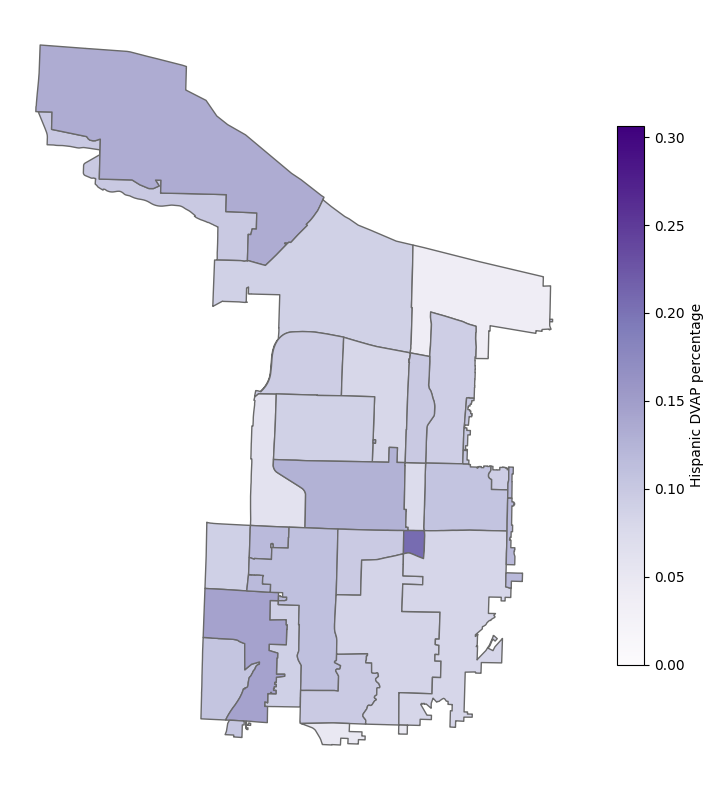

In [38]:
ax = D1_precincts_df.plot(column = 'HDVAP22_pct', legend = True, 
                          legend_kwds={"label": "Hispanic DVAP percentage", 'shrink': 0.7}, 
                          figsize = (10,10),
                          cmap = 'Purples',
                          edgecolor = 'dimgrey',
                          vmin = 0,
                          vmax = max_HDVAP_pct
                         )
ax.set_axis_off()

### Asian DVAP percentage:

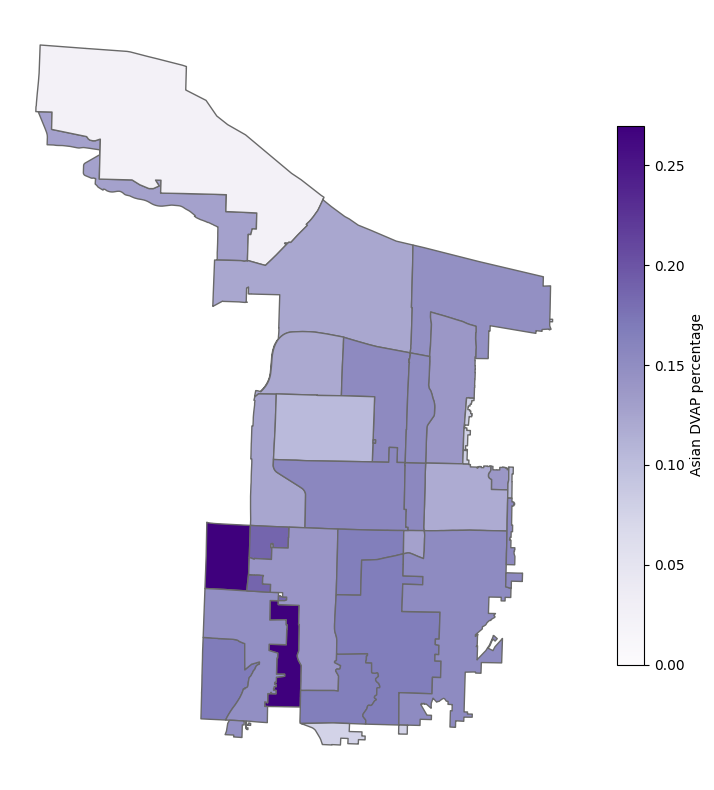

In [39]:
ax = D1_precincts_df.plot(column = 'AAPIDVAP22_pct', legend = True, 
                          legend_kwds={"label": "Asian DVAP percentage", 'shrink': 0.7}, 
                          figsize = (10,10),
                          cmap = 'Purples',
                          edgecolor = 'dimgrey',
                          vmin = 0,
                          vmax = max_AAPIDVAP_pct
                         )
ax.set_axis_off()

### Black DVAP percentage:

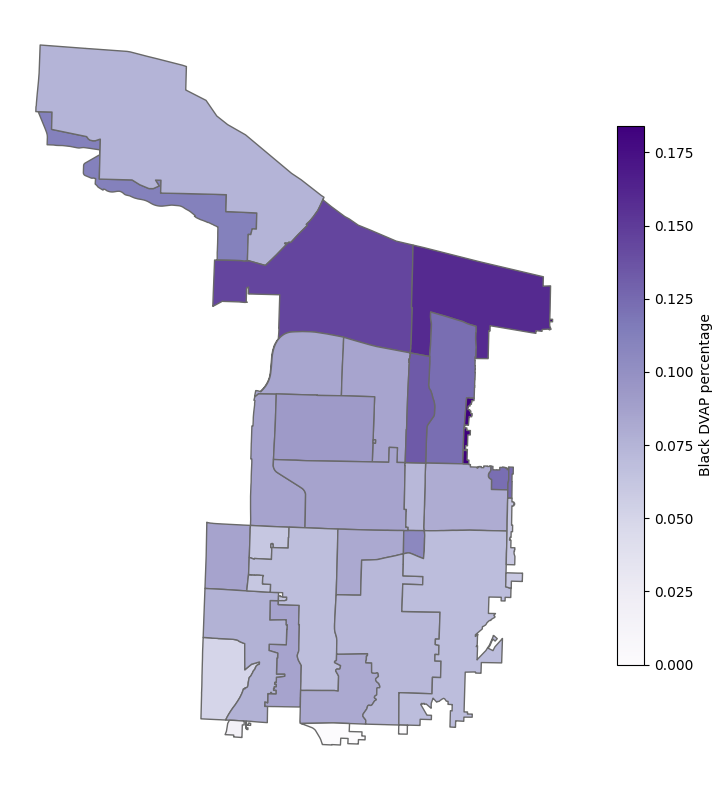

In [40]:
ax = D1_precincts_df.plot(column = 'BDVAP22_pct', legend = True, 
                          legend_kwds={"label": "Black DVAP percentage", 'shrink': 0.7}, 
                          figsize = (10,10),
                          cmap = 'Purples',
                          edgecolor = 'dimgrey',
                          vmin = 0,
                          vmax = max_BDVAP_pct
                         )
ax.set_axis_off()

### American Indian percentage:

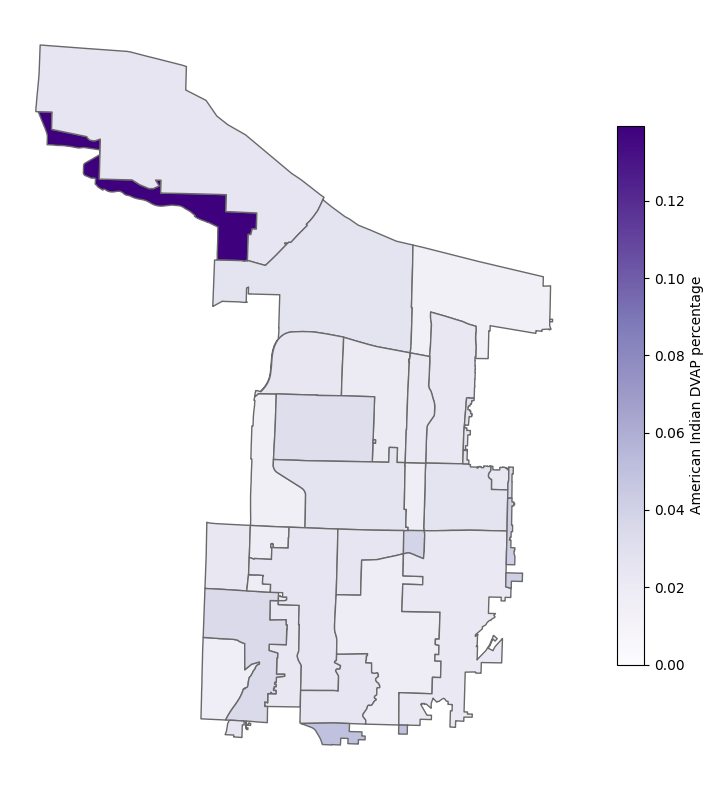

In [41]:
ax = D1_precincts_df.plot(column = 'AMINDVAP22_pct', legend = True, 
                          legend_kwds={"label": "American Indian DVAP percentage", 'shrink': 0.7}, 
                          figsize = (10,10),
                          cmap = 'Purples',
                          edgecolor = 'dimgrey',
                          vmin = 0,
                          vmax = max_AMINDVAP_pct
                         )
ax.set_axis_off()

### POC DVAP percentage:

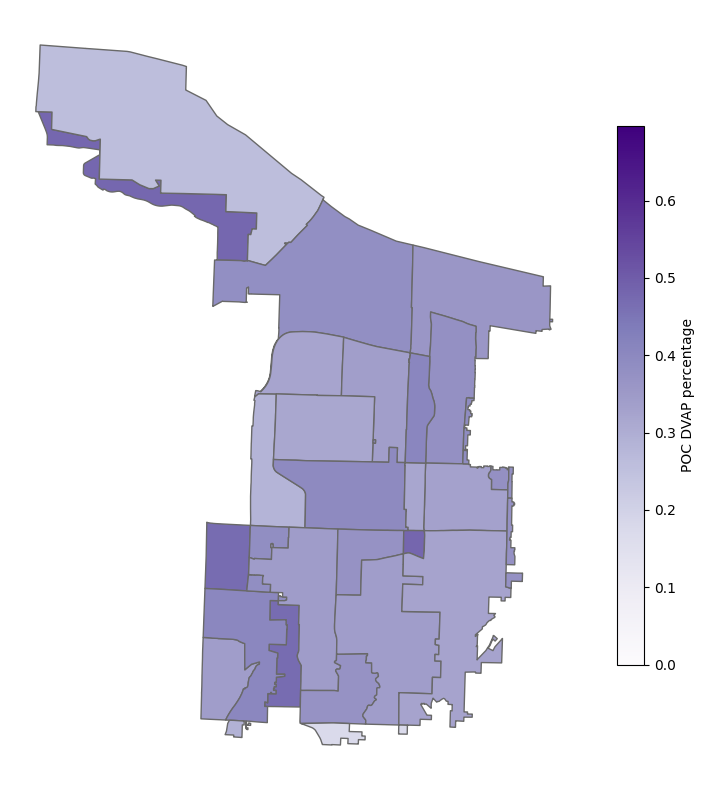

In [42]:
ax = D1_precincts_df.plot(column = 'POCDVAP22_pct', legend = True, 
                          legend_kwds={"label": "POC DVAP percentage", 'shrink': 0.7}, 
                          figsize = (10,10),
                          cmap = 'Purples',
                          edgecolor = 'dimgrey',
                          vmin = 0,
                          vmax = max_POCDVAP_pct
                         )
ax.set_axis_off()

### Oooh, let's also do choropleths for ballot lengths!

In [44]:
for i in range(1,7):
    D1_precincts_df['Ballot length ' + str(i) + ' pct'] = D1_precincts_df['Ballot length ' + str(i)]/D1_precincts_df['Ballot length total']

In [47]:
max_ballot_length_pct = max([max(D1_precincts_df['Ballot length ' + str(i) + ' pct']) for i in range(1,7)])
max_ballot_length_pct

0.6

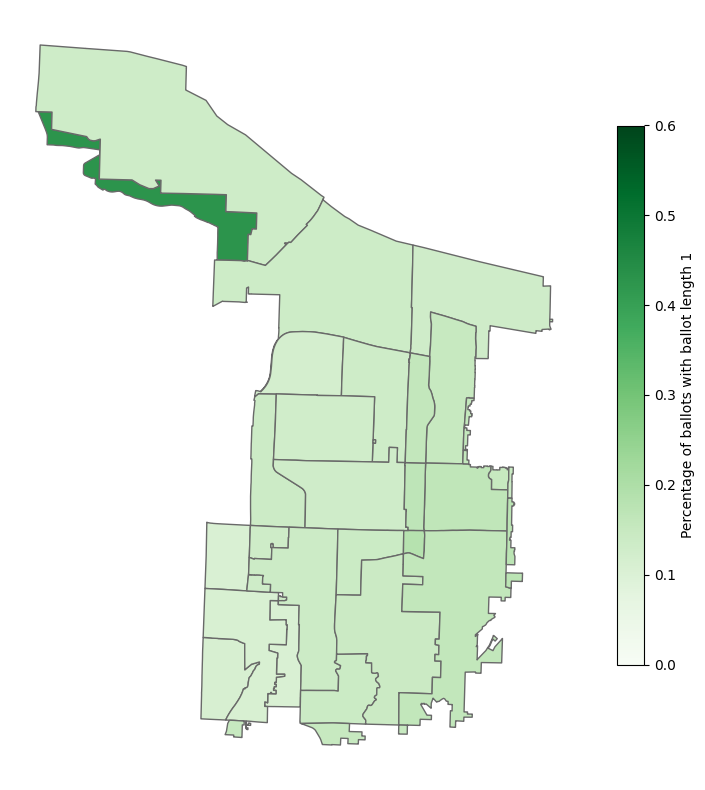

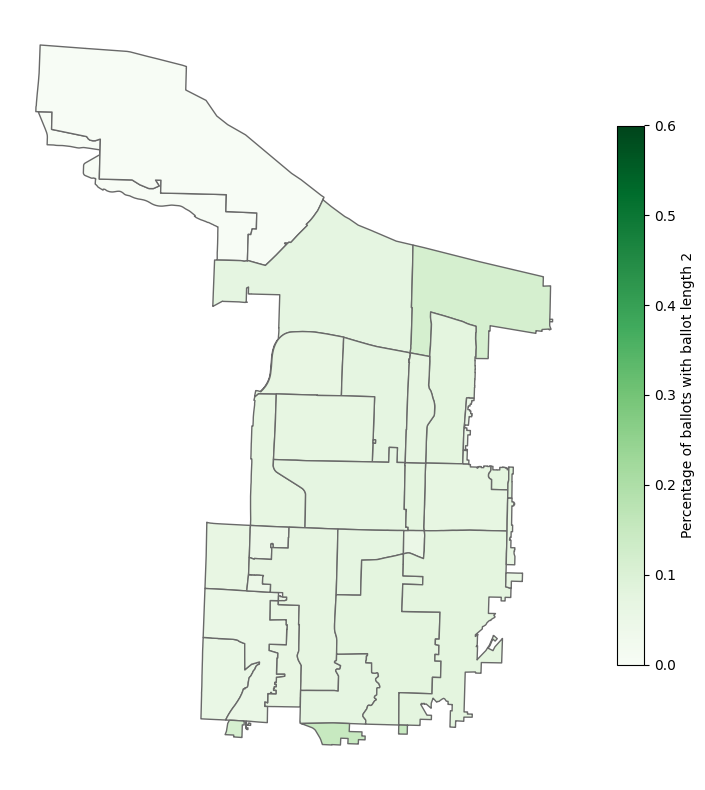

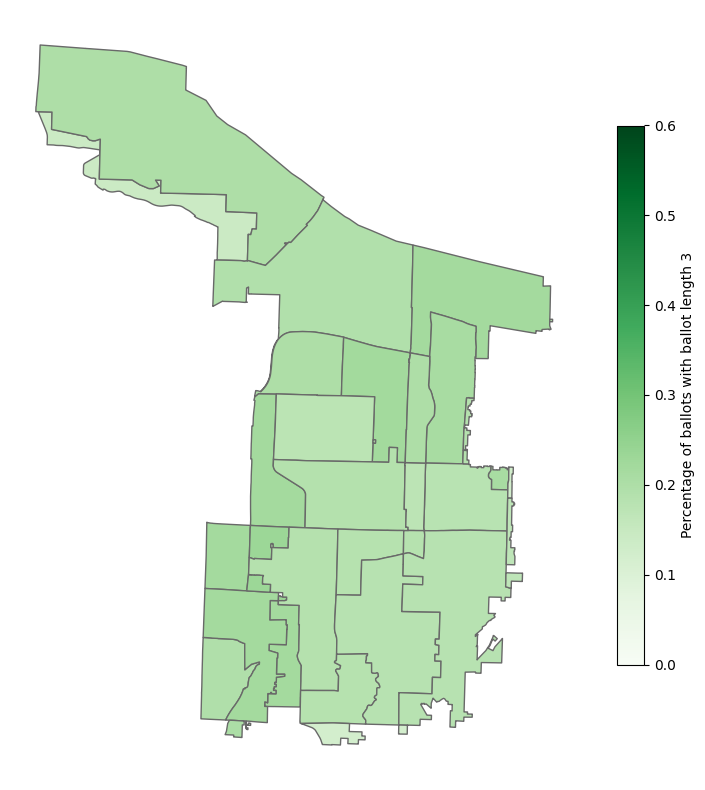

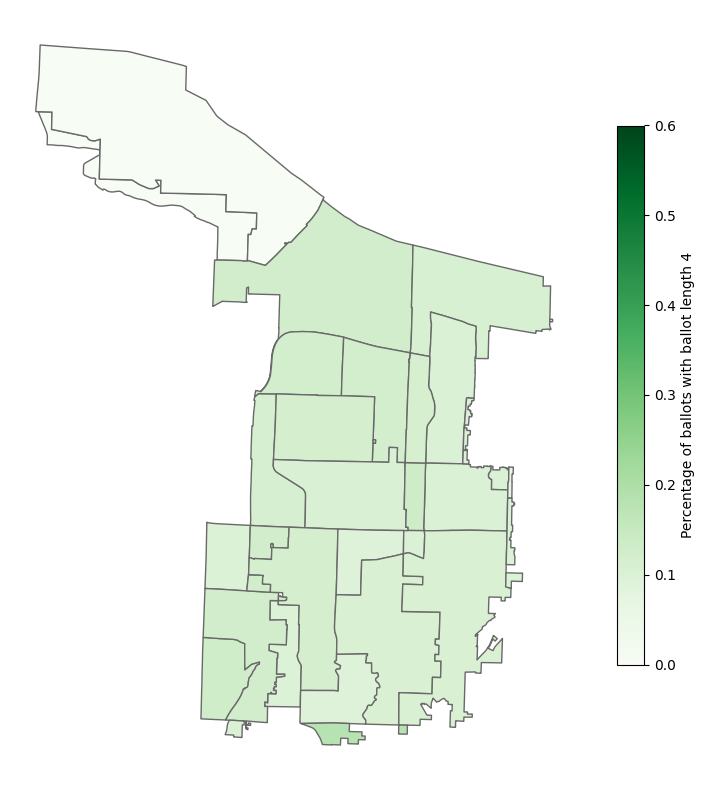

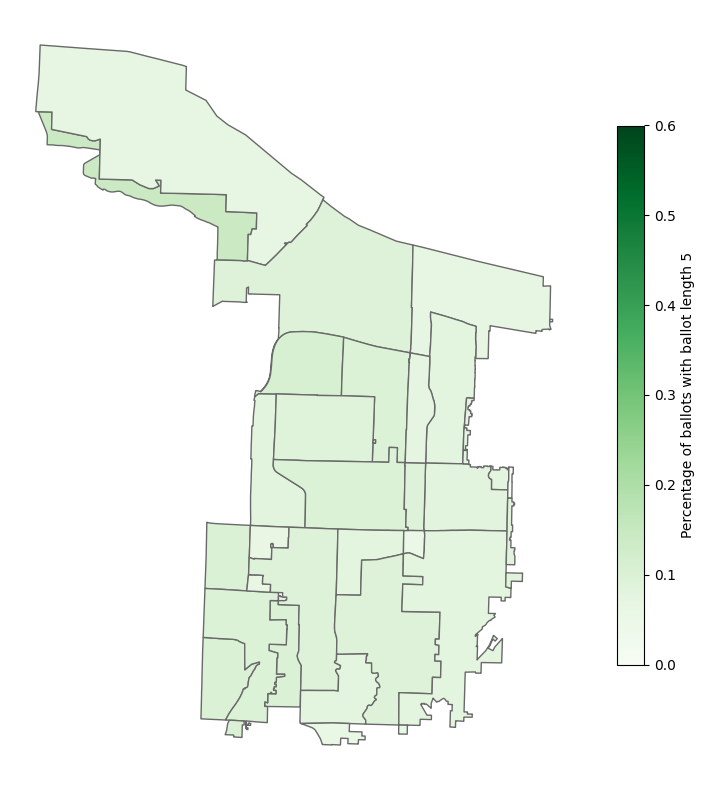

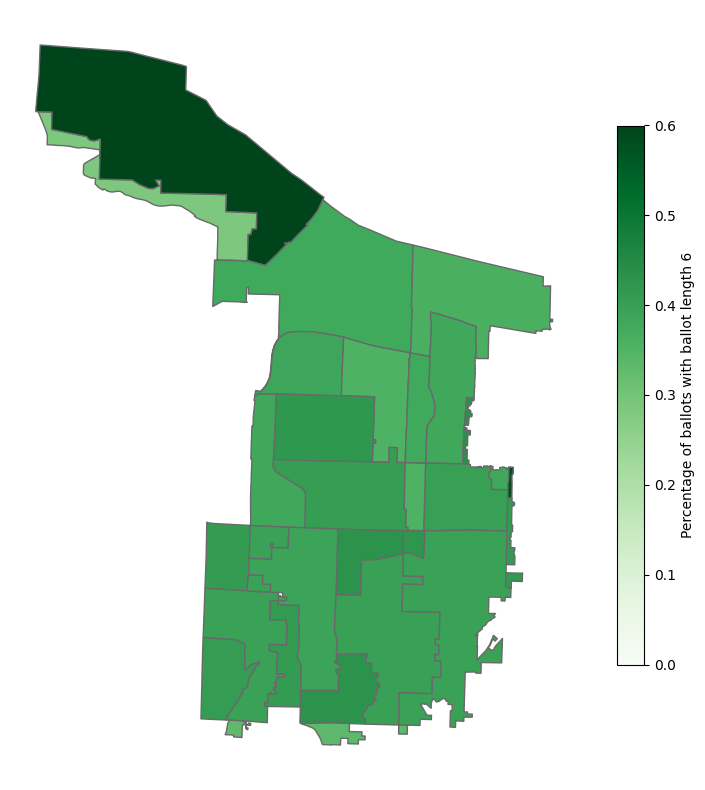

In [48]:
for i in range(1,7):
    ax = D1_precincts_df.plot(column = 'Ballot length ' + str(i) + ' pct', legend = True,
                              legend_kwds={"label": 'Percentage of ballots with ballot length ' + str(i), 'shrink': 0.7}, 
                              figsize = (10,10),
                              cmap = 'Greens',
                              edgecolor = 'dimgrey',
                              vmin = 0,
                              vmax = max_ballot_length_pct
                             )
    ax.set_axis_off()